# Insurance Claim Fraud Detection

## Project Description:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 


## Attribute Information

1.	months_as_customer: Number of months of patronage
2.	age: the length of time a customer has lived or a thing has existed
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	policy_csl: is basically Combined Single Limit
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	insured_education_level: This refers to the Level of education of the customer
13.	insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_model: This refers to the model of the vehicle
38.	auto_year: This refers to the year which the vehicle was manufactured
39.	_c39:
40.	fraud_reported


## Requirement:
We have to create a predictive model that predicts if an insurance claim is fraudulent or not.

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df_insurance=pd.read_csv("Insurance_Claim.csv")
pd.options.display.max_columns=None
df_insurance.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


## Starting the EDA

In [3]:
# Checking Configuration of Dataset
df_insurance.shape

(1000, 40)

The dataset contains information of 1000 customers and multiple information related to them is stored in 39 input columns, and based on that it is predicted whether the customer's claim can be classified as fraud or not

In [4]:
# Checking data types of attributes
df_insurance.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Obs- The datset contains combination of both categorical and continuous column

In [5]:
#Seperating Numerical and Categorical Column
cat_cols = [x for x in df_insurance.columns if df_insurance[x].dtypes=='O']

num_cols = [y for y in df_insurance.columns if df_insurance[y].dtypes!='O']

In [6]:
# Checking for null values if any
df_insurance.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Obs- We can see except fo _c39 column, no other columns have any null entries. And _c39 have all 1000 entries as null, and therefor we will be de;letong it

In [7]:
# Deleting _c39 Column
df_insurance.drop(columns='_c39',axis=1,inplace=True)

In [8]:
df_insurance.shape

(1000, 39)

In [9]:
# Checking for blank spaces, random characters in each column

In [10]:
specialchar =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for i in df_insurance:
    for s in specialchar:
        print(f"{s} in {i} = ",end= " ")
        print((df_insurance[i] == s).sum())

  in months_as_customer =  0
? in months_as_customer =  0
- in months_as_customer =  0
 ? in months_as_customer =  0
 - in months_as_customer =  0
?  in months_as_customer =  0
-  in months_as_customer =  0
 ?  in months_as_customer =  0
 -  in months_as_customer =  0
NA in months_as_customer =  0
N/A in months_as_customer =  0
 NA in months_as_customer =  0
 N/A in months_as_customer =  0
  in age =  0
? in age =  0
- in age =  0
 ? in age =  0
 - in age =  0
?  in age =  0
-  in age =  0
 ?  in age =  0
 -  in age =  0
NA in age =  0
N/A in age =  0
 NA in age =  0
 N/A in age =  0
  in policy_number =  0
? in policy_number =  0
- in policy_number =  0
 ? in policy_number =  0
 - in policy_number =  0
?  in policy_number =  0
-  in policy_number =  0
 ?  in policy_number =  0
 -  in policy_number =  0
NA in policy_number =  0
N/A in policy_number =  0
 NA in policy_number =  0
 N/A in policy_number =  0
  in policy_bind_date =  0
? in policy_bind_date =  0
- in policy_bind_date =  0


Obs- We can see '?' entries in the columns: 'collision_type'-343 ,'property_damage'-360, 'police_report_available'-178 and all these 3 columns are of type 'object', thus we will be filling these '?' mark enries with the most frequent item of that column

In [11]:
# Checking for white spaces
#pd.options.display.max_rows=None
df_insurance.loc[0:]==" "

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Obs- There are no white spaces in the data

In [12]:
#Check for duplicate data
df_insurance.duplicated().sum()

0

Obs- There is no duplicate data in the dataset

In [13]:
# Replacing '?' with null to further replace the null values with most frequent item using simple imputer
df_insurance.replace({'?': np.nan}, inplace=True)

In [14]:
# Checking the '?' count
(df_insurance=='?').sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [15]:
# filling the missing values of continuous cols
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
filler = ColumnTransformer([('categorical_transformer', SimpleImputer(strategy='most_frequent'), cat_cols)])
df_insurance[cat_cols] = filler.fit_transform(df_insurance[cat_cols])

In [16]:
# Rechecking the null values
df_insurance.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Obs- The data has been cleaned now

In [17]:
#Checking description of dataset
df_insurance.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Obs- 
* The mean in columns:'months_as_customer', 'age', 'policy_number','policy_deductable','umbrella_limit','insured_zip', 'capital-gains', 'capital-loss', 'number_of_vehicles_involved', 'witnesses', 'injury_claim', 'property_claim' is greater than median and thus we can say Right Skewness is present in these columns.

* The mean in columns:'policy_annual_premium','incident_hour_of_the_day', 'bodily_injuries','total_claim_amount', , 'vehicle_claim' is less than median, and thus we can say left skewness is present in the column

* The max of many columns is exceptionally greter than 75% , so we can predict outliers must be present in the columns

In [18]:
# Checking the Unique Values in each column
df_insurance.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Obs- 
* We can see the columns-'policy_number','incident_location' have all unique entries and are not useful for model buliding , so we delete them.
* Also, the column 'insured_zip' have 995 unique entries and again is not a useful column, and thus deleting it.
* Two date related columns: 'policy_bind_date' & 'incident_date' are also present and thus, would extract day,moth, year from both these columns

In [19]:
# Dropping the unwanted columns
df_insurance.drop(columns=['policy_number','insured_zip','incident_location'],inplace=True)

In [20]:
df_insurance.shape

(1000, 36)

In [21]:
# Extracting date-month-year from 'policy_bind_date'

#Converting object data type to datetime 
df_insurance['policy_bind_date'] =  pd.to_datetime(df_insurance['policy_bind_date'])


df_insurance["policy_bind_year"]=pd.to_datetime(df_insurance.policy_bind_date, format="%d/%m/%Y").dt.year

df_insurance["policy_bind_month"]=pd.to_datetime(df_insurance.policy_bind_date, format="%d/%m/%Y").dt.month

df_insurance["policy_bind_day"]=pd.to_datetime(df_insurance.policy_bind_date, format="%d/%m/%Y").dt.day

In [22]:
df_insurance.head(5)

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014,10,17
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,2006,6,27
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000,6,9
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,5,25
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014,6,6


Obs- We can see the 3 columns 'policy_bind_year','policy_bind_month' and 'policy_bind_day have been added to the datset , and thus deleting 'policy_bind_date' 

In [23]:
# Deleting the column policy_bind_date
df_insurance.drop(columns='policy_bind_date',axis=1,inplace=True)

In [24]:
df_insurance.shape

(1000, 38)

In [25]:
# Extracting date-month-year from 'incident_date'

#Converting object data type to datetime 
df_insurance['incident_date'] =  pd.to_datetime(df_insurance['incident_date'])


df_insurance["incident_year"]=pd.to_datetime(df_insurance.incident_date, format="%d/%m/%Y").dt.year

df_insurance["incident_month"]=pd.to_datetime(df_insurance.incident_date, format="%d/%m/%Y").dt.month

df_insurance["incident_day"]=pd.to_datetime(df_insurance.incident_date, format="%d/%m/%Y").dt.day

In [26]:
df_insurance.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014,10,17,2015,1,25
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,2006,6,27,2015,1,21
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000,6,9,2015,2,22
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,5,25,2015,10,1
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014,6,6,2015,2,17


Obs- We can see the 3 columns 'incident_year','incident_month' and 'incident_day have been added to the datset , and thus deleting 'incident_date' column

In [27]:
df_insurance.drop(columns='incident_date',axis=1,inplace=True)

In [28]:
df_insurance.shape

(1000, 40)

In [29]:
# Checking 'incident_year' values, as it seems all values are 2015
df_insurance['incident_year'].value_counts()

2015    1000
Name: incident_year, dtype: int64

Obs- We can see all the entries of incident-year is of 2015, thus deleting this column

In [30]:
# Deleting Incident_Year column
df_insurance.drop(columns='incident_year',axis=1,inplace=True)

In [31]:
df_insurance.shape

(1000, 39)

In [32]:
#Reassigning changes made to  Numerical and Categorical Column
cat_cols = [x for x in df_insurance.columns if df_insurance[x].dtypes=='O']

num_cols = [y for y in df_insurance.columns if df_insurance[y].dtypes!='O']

## Visualization

### 1. Univariate Analysis

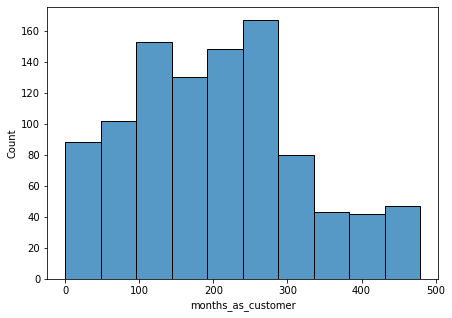

In [33]:
# Histogram plot to check distribution of months_as_customer
plt.figure(figsize=(7,5))
sns.histplot(df_insurance['months_as_customer'],bins=10)
plt.show()

Obs- We can see the customer-base associated with the auto-company is ranging from customers who have just enrolled to who have even completed more than 400 months(i.e more than 33 years)

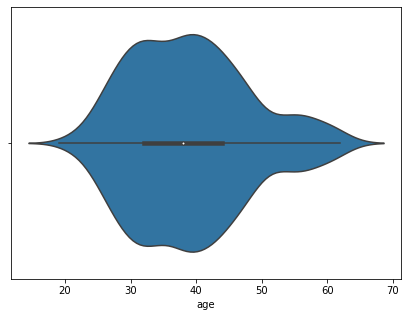

In [34]:
# Violin plot to check distribution of age
plt.figure(figsize=(7,5))
sns.violinplot(df_insurance['age'],bins=10)
plt.show()

Obs- We can see maximum customer-base have applied for insurance in the age group 30-40, few  customers who have applied below 20 too and there are less no. of customers in age group 60-70.

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


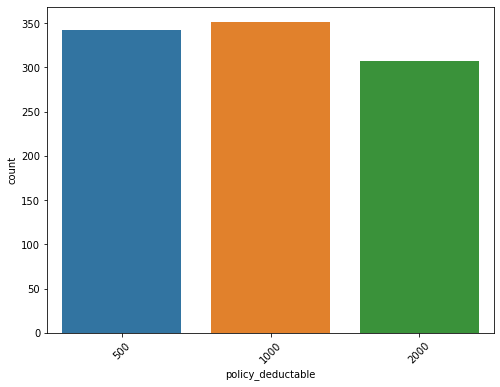

In [35]:
# Count plot to check individual value counts of 'policy_deductable '
print(df_insurance['policy_deductable'].value_counts())

plt.figure(figsize=(8,6))
sns.countplot(df_insurance['policy_deductable'])
plt.xticks(rotation=45)
plt.show()

obs-Customers responsible for paying the amount of money towards an insured loss is 500,1000 and 2000

In [36]:
 # Checking the Unique Values in each column
df_insurance.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim      

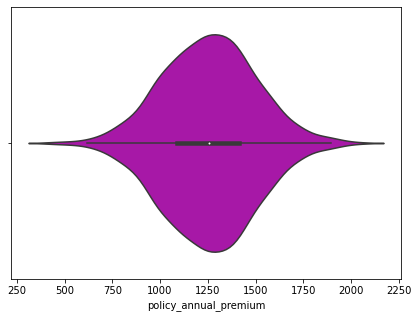

In [37]:
# Violin plot to check distribution of policy_annual_premium
plt.figure(figsize=(7,5))
sns.violinplot(df_insurance['policy_annual_premium'],bins=10,color='m')
plt.show()

Obs- the amount of Regular Premium payable by the Policyholder in a Policy Year falls from 1000-1500 for major customers

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


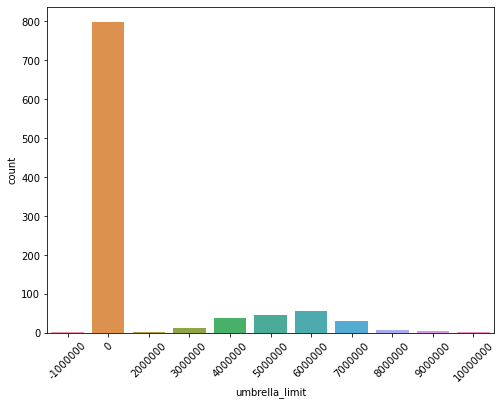

In [38]:
# Count plot to check individual value counts of 'umbrella_limit '
print(df_insurance['umbrella_limit'].value_counts())

plt.figure(figsize=(8,6))
sns.countplot(df_insurance['umbrella_limit'])
plt.xticks(rotation=45)
plt.show()

Obs- The umbrella_limit provided to most of the customers is 0, however some efiicient plans taken by customers help in giving them umbrella limit of 2000000-10000000

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


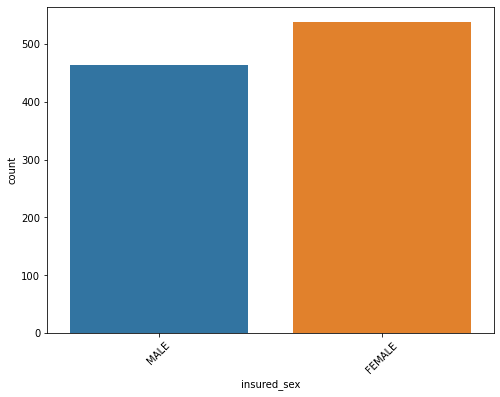

In [39]:
# Count plot to check individual value counts of 'insured_sex '
print(df_insurance['insured_sex'].value_counts())

plt.figure(figsize=(8,6))
sns.countplot(df_insurance['insured_sex'])
plt.xticks(rotation=45)
plt.show()

Obs- We can see the number of Females insured are more than males 

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


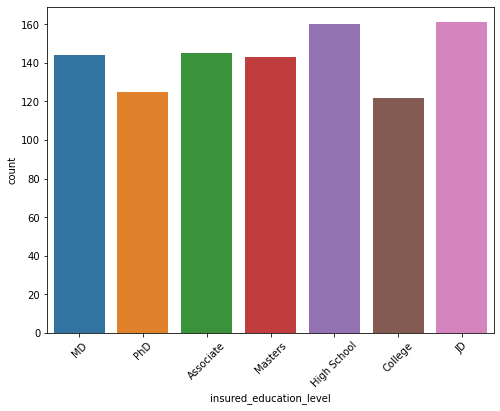

In [40]:
# Count plot to check individual value counts of 'insured_education_level '
print(df_insurance['insured_education_level'].value_counts())

plt.figure(figsize=(8,6))
sns.countplot(df_insurance['insured_education_level'])
plt.xticks(rotation=45)
plt.show()

Obs- We can see people make their vehicles insured from an age when they start going to College

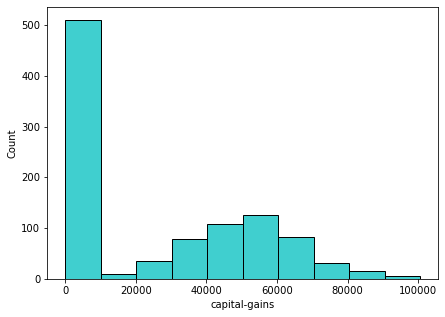

In [41]:
# Histogram to check distribution of capital-gains
plt.figure(figsize=(7,5))
sns.histplot(df_insurance['capital-gains'],bins=10,color='c')
plt.show()

Obs- We can observe that profit accrued due to insurance premium is 0 by most customers, however few do benefit in the range of 20000-100000

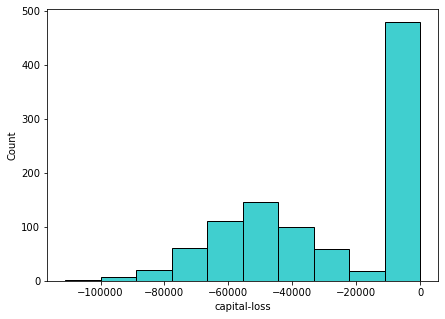

In [42]:
# Histogram to check distribution of capital-loss
plt.figure(figsize=(7,5))
sns.histplot(df_insurance['capital-loss'],bins=10,color='c')
plt.show()

Obs- We can observe that losses inccured due to insurance premium is 0 by most customers, however few do loss in the range of 20000-100000

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


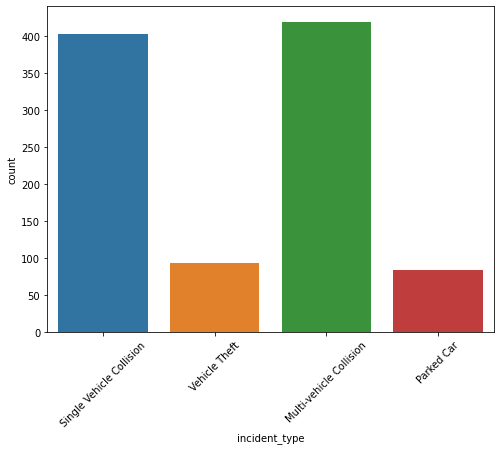

In [43]:
# Count plot to check individual value counts of 'incident-type'
print(df_insurance['incident_type'].value_counts())

plt.figure(figsize=(8,6))
sns.countplot(df_insurance['incident_type'])
plt.xticks(rotation=45)
plt.show()

Obs- The major type of claim/vehicle damage made by customer is'Multi-vehicle-collision', followed by 'Single-vehicle-Collision' and other reported types are  'Vehicle Theft' and 'Parked Car'

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


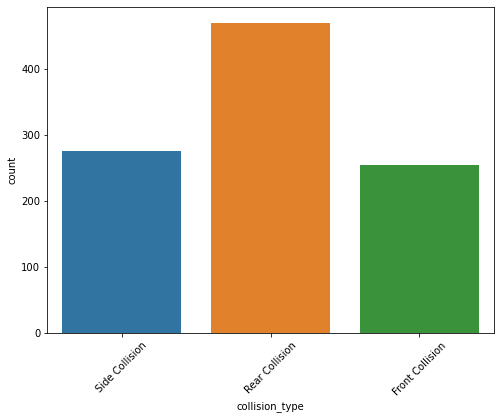

In [44]:
# Count plot to check individual value counts of 'collision-type'
print(df_insurance['collision_type'].value_counts())

plt.figure(figsize=(8,6))
sns.countplot(df_insurance['collision_type'])
plt.xticks(rotation=45)
plt.show()

Obs- The area of damage on the vehicle is majorly through Rear Collision. followed by side collision and then the Front Collision

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


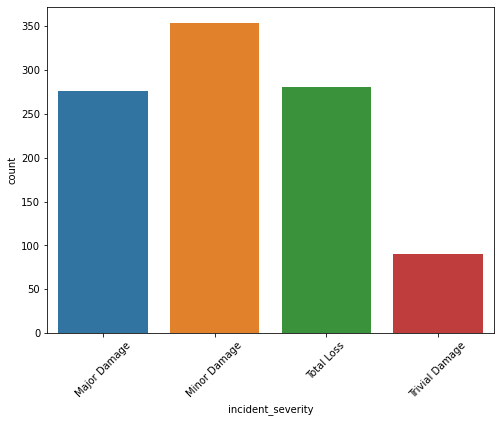

In [45]:
# Count plot to check individual value counts of 'incident_severity'
print(df_insurance['incident_severity'].value_counts())

plt.figure(figsize=(8,6))
sns.countplot(df_insurance['incident_severity'])
plt.xticks(rotation=45)
plt.show()

Obs- The extent of damage is many times 'Minor Damage' , however there are many cases when the damage reported are 'Total loss' or 'Major Damage' , few cases of 'Trivial Damage' are also been reported

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


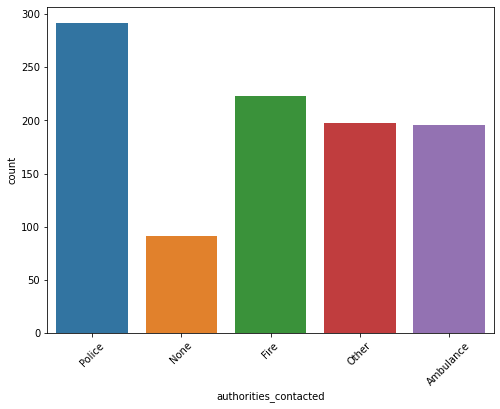

In [46]:
# Count plot to check individual value counts of 'authorities_contacted'
print(df_insurance['authorities_contacted'].value_counts())

plt.figure(figsize=(8,6))
sns.countplot(df_insurance['authorities_contacted'])
plt.xticks(rotation=45)
plt.show()

Obs- During the incident, majorly 'Police' are contacted, followed by 'Fire Extinguishers', in most severe cases 'Ambulance' , sometimes none or some aother authorities are been contacted

17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64


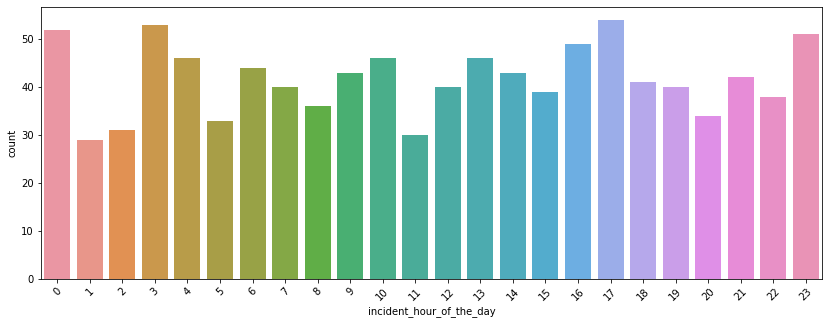

In [47]:
# Count plot to check individual value counts of 'incident_hour_of_the_day'
print(df_insurance['incident_hour_of_the_day'].value_counts())

plt.figure(figsize=(14,5))
sns.countplot(df_insurance['incident_hour_of_the_day'])
plt.xticks(rotation=45)
plt.show()

Obs- We can see major incidents are reported at evening 5'o clock, followed by latenight 3'o clock, 11 & 12' o clock and least no of incidents are reported for latenight 1' & 2'o clock and afternoon 11'o clock

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


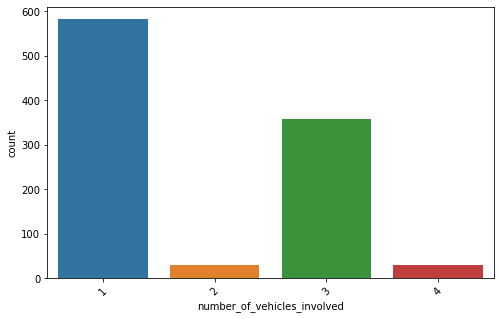

In [48]:
# Count plot to check individual value counts of 'number_of_vehicles_involved'
print(df_insurance['number_of_vehicles_involved'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(df_insurance['number_of_vehicles_involved'])
plt.xticks(rotation=45)
plt.show()

Obs- The number of vehicles involved during the incidents are mainly 1, sometimes even 3, a few times 2 or 4

NO     698
YES    302
Name: property_damage, dtype: int64


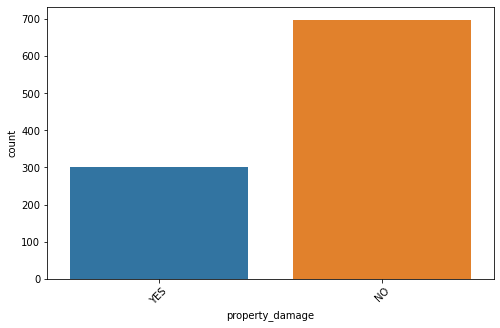

In [49]:
# Count plot to check individual value counts of 'property_damage'
print(df_insurance['property_damage'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(df_insurance['property_damage'])
plt.xticks(rotation=45)
plt.show()

Obs- The incidents that involves property-damage = 302, while where property damage is not done=698

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


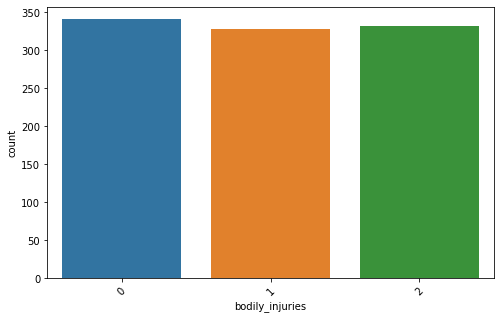

In [50]:
# Count plot to check individual value counts of 'bodily_injuries'
print(df_insurance['bodily_injuries'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(df_insurance['bodily_injuries'])
plt.xticks(rotation=45)
plt.show()

Obs- The no of bodily injuries reportes are 0,1 and max 2

NO     686
YES    314
Name: police_report_available, dtype: int64


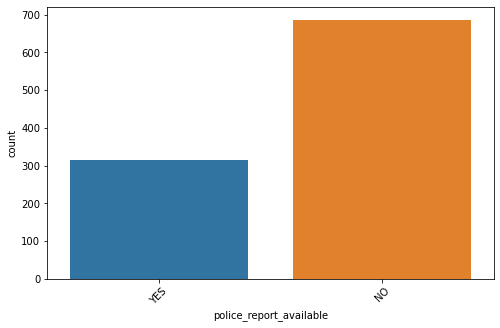

In [51]:
# Count plot to check individual value counts of 'police_report_available'
print(df_insurance['police_report_available'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(df_insurance['police_report_available'])
plt.xticks(rotation=45)
plt.show()

Obs- Only 314 of the incidents reported have police-report available, while the double of it dont have it

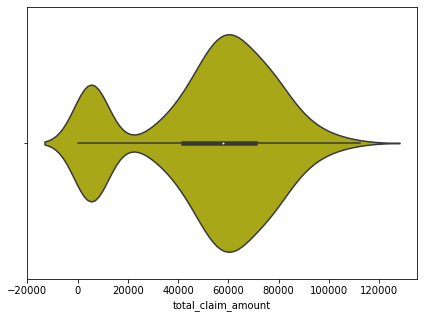

In [52]:
# Violin plot to check distribution of policy_annual_premium
plt.figure(figsize=(7,5))
sns.violinplot(df_insurance['total_claim_amount'],bins=10,color='y')
plt.show()

Obs- We can see the total claim amount is in range of 50000-70000 for major customers , a few people have claim - amount of 0 as well, and other few who have in negatives too(loss)

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


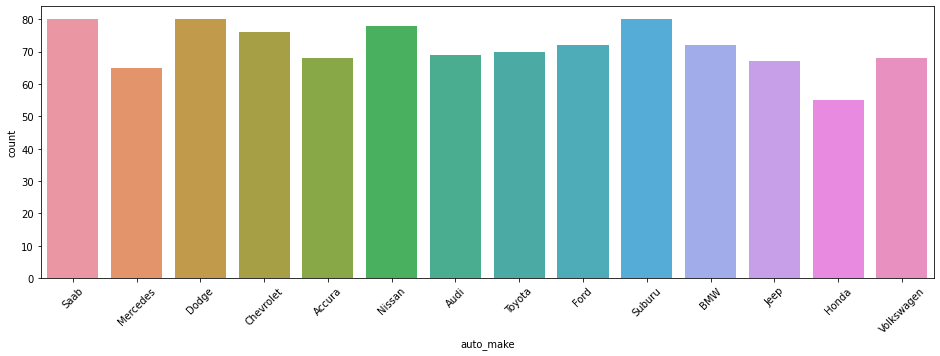

In [53]:
# Count plot to check individual value counts of 'auto_make'
print(df_insurance['auto_make'].value_counts())

plt.figure(figsize=(16,5))
sns.countplot(df_insurance['auto_make'])
plt.xticks(rotation=45)
plt.show()

Obs- The maximum incidents regeistered for insurance are by customers who have vehicles 'Saab','Dodge' and 'Suburu'and the least by 'Honda' owners

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


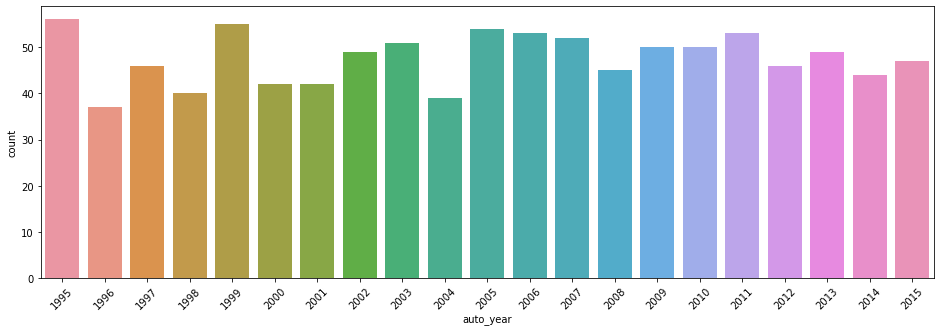

In [54]:
# Count plot to check individual value counts of 'auto_make'
print(df_insurance['auto_year'].value_counts())

plt.figure(figsize=(16,5))
sns.countplot(df_insurance['auto_year'])
plt.xticks(rotation=45)
plt.show()

Obs- Except for the year 1996, that have least no of incidents registered, we can infer that older models are involved in more no of incidents as compared to newer models

N    753
Y    247
Name: fraud_reported, dtype: int64


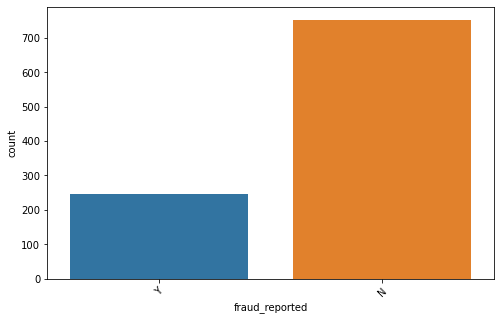

In [55]:
# Count plot to check individual value counts of 'fraud_reported'
print(df_insurance['fraud_reported'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(df_insurance['fraud_reported'])
plt.xticks(rotation=45)
plt.show()

Obs- The number of incidents reported that are classified as fraud are =247, while the one's that are classified as genuine are= 753

1     365
2     312
8      39
12     39
6      37
4      36
7      35
10     34
3      31
9      30
5      23
11     19
Name: incident_month, dtype: int64


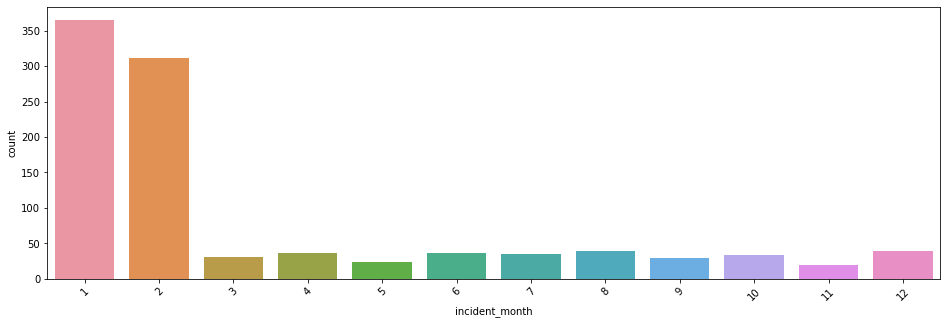

In [56]:
# Count plot to check individual value counts of 'incident_month'
print(df_insurance['incident_month'].value_counts())

plt.figure(figsize=(16,5))
sns.countplot(df_insurance['incident_month'])
plt.xticks(rotation=45)
plt.show()

Obs- The maximum no of incidents repoerted are in the month of January, followed by February , rest all other months have very little cases reported

In [57]:
# Distribution plot to check skewness in the features

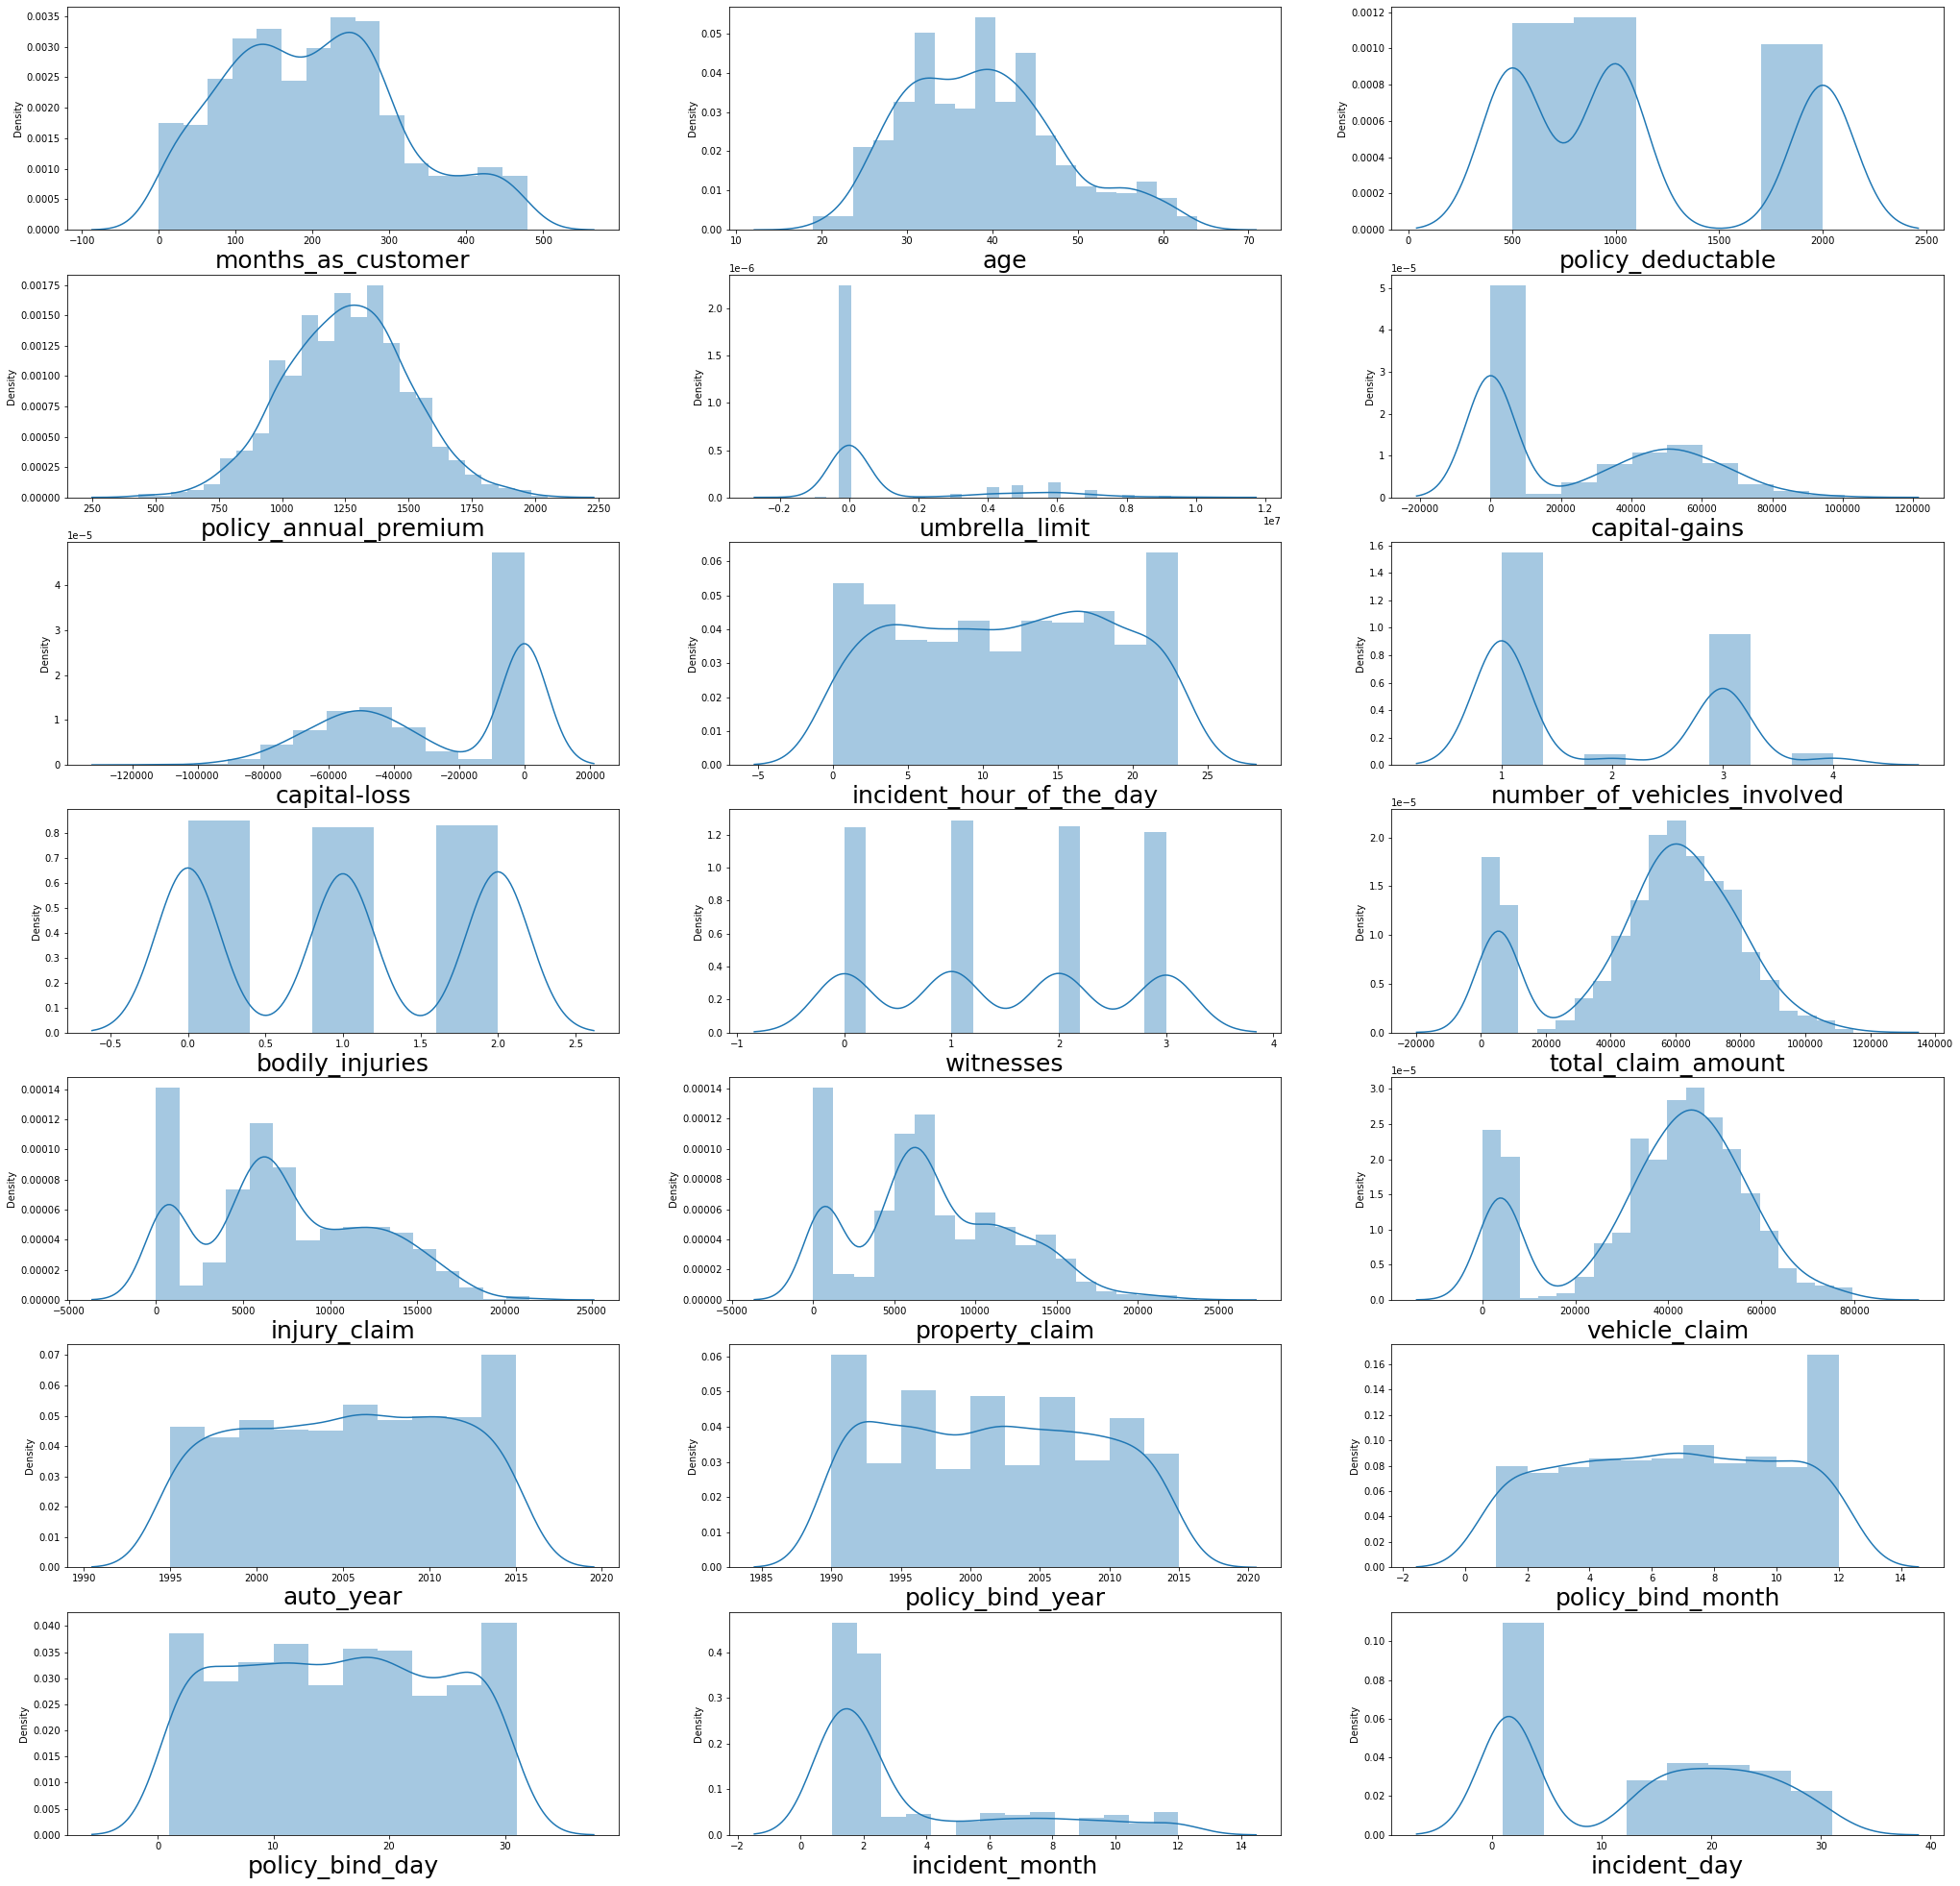

In [58]:
plt.figure(figsize=(35,35))
plotnumber=1

for column in df_insurance[num_cols]:
    if plotnumber<=21: #as there are 21 numerical columns 
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df_insurance[column])
        plt.xlabel(column,fontsize=25)
    plotnumber +=1
plt.show()

obs- We can see right skewness in columns: 'months_as_customer', 'age','policy_deductable','umbrella_limit', 'capital-gains', 'capital-loss', 'number_of_vehicles_involved', 'witnesses', 'injury_claim', 'property_claim','policy_bind_year','policy_bind_day','incident_month','incident_day' and left skewness in column 'policy_annual_premium','incident_hour_of_the_day', 'bodily_injuries','total_claim_amount', 'vehicle_claim'  

In [59]:
#box plot to check outliers

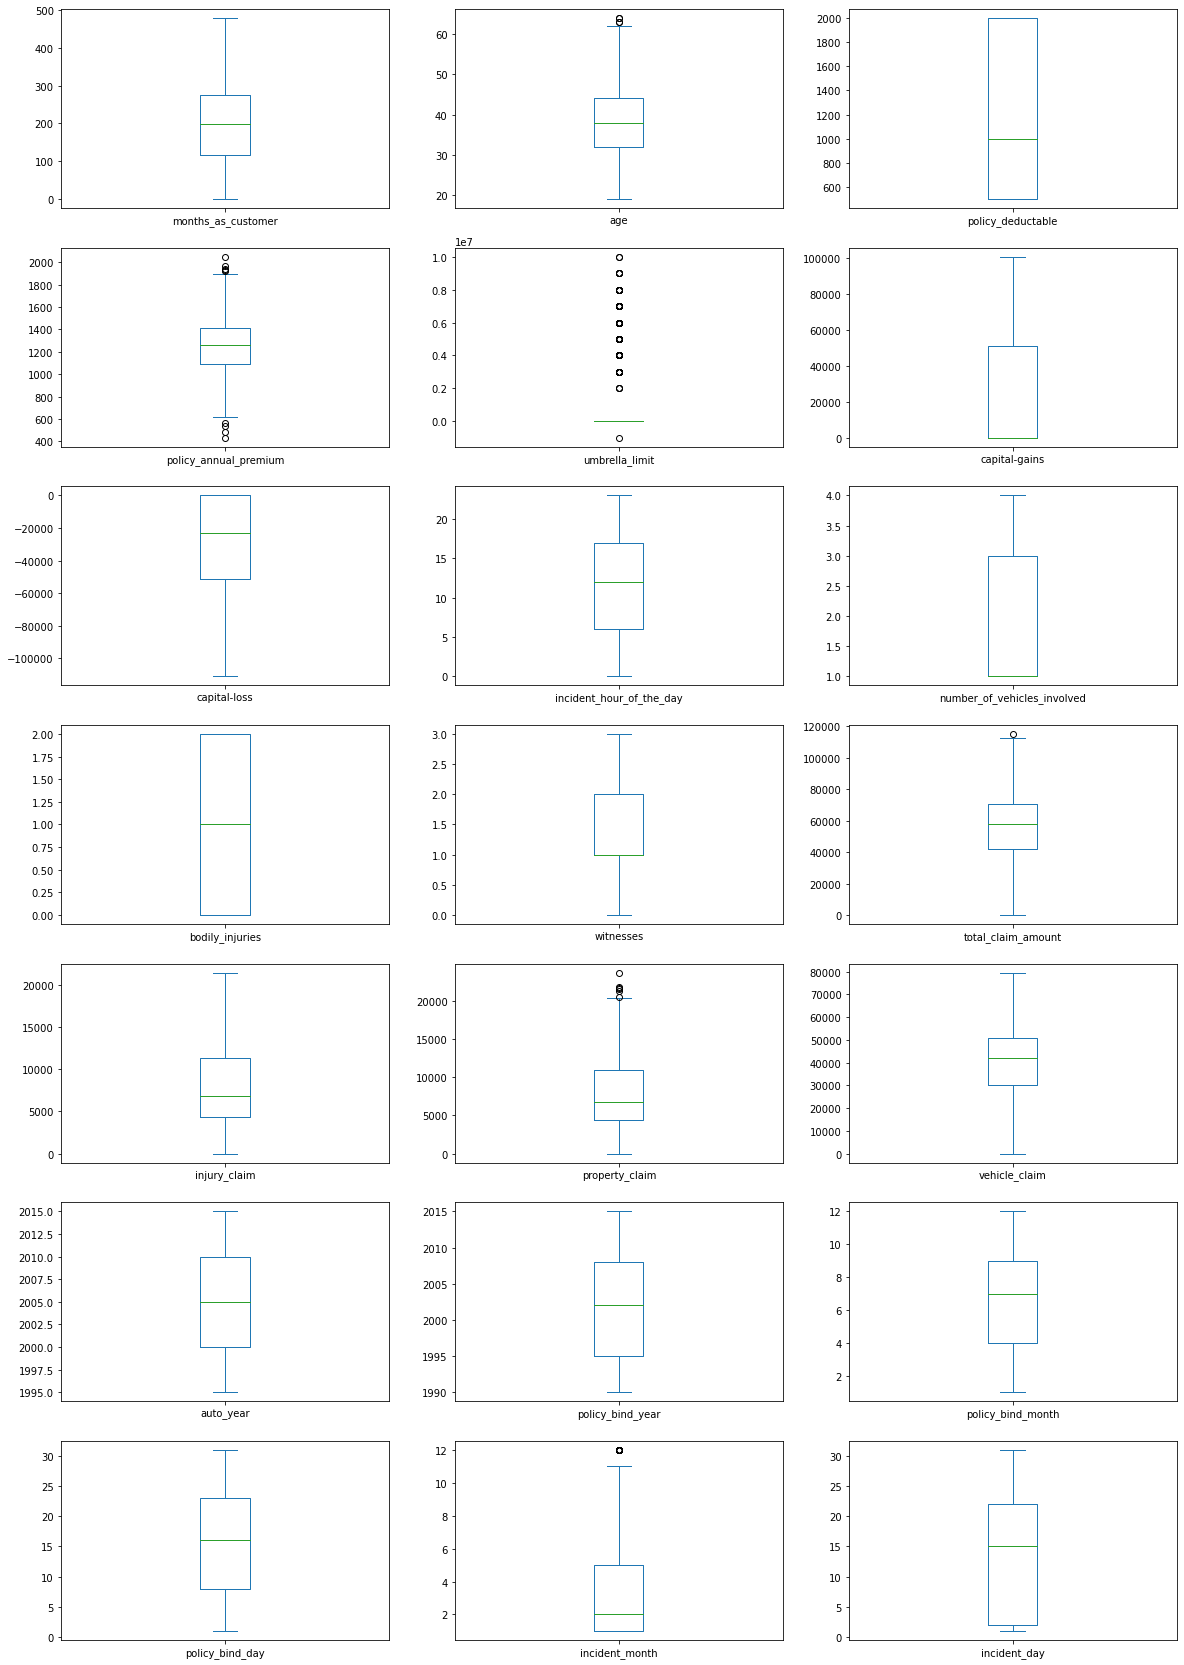

In [60]:
df_insurance[num_cols].plot(kind='box',subplots=True,layout=(7,3),figsize=(20,30))
plt.show()

Obs- We can observe outliers in columns: 'age', 'policy_annual_premium', 'umbrella_limit','property_claim', 'incident_month

### Bivariate Analysis

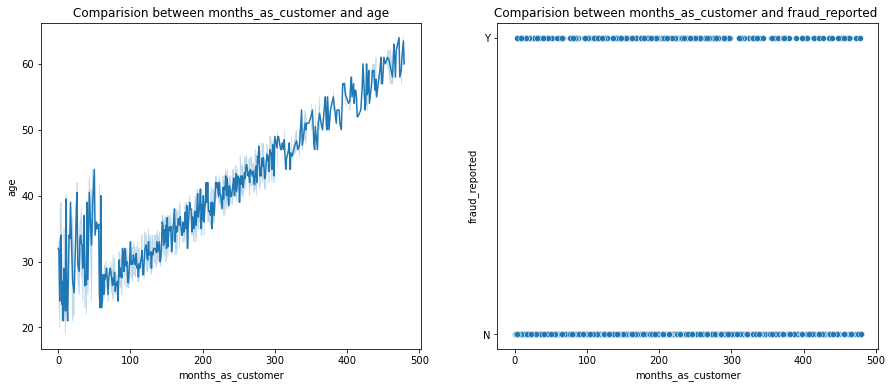

In [61]:
#Comparision between 'months_as_customer and other attributes'
plt.figure(figsize=[15,6])

plt.subplot(1,2,1)
plt.title('Comparision between months_as_customer and age')
sns.lineplot(df_insurance['months_as_customer'],df_insurance['age']);

plt.subplot(1,2,2)
plt.title('Comparision between months_as_customer and fraud_reported ')
sns.scatterplot(df_insurance['months_as_customer'],df_insurance['fraud_reported']);

Obs- 
* We can see the higher age customers have served more no. of months being customers to the company.
* And being associated with the company for more period of time does not affect the fraud, i,e fraud are reportesd irrespective of months-of customer

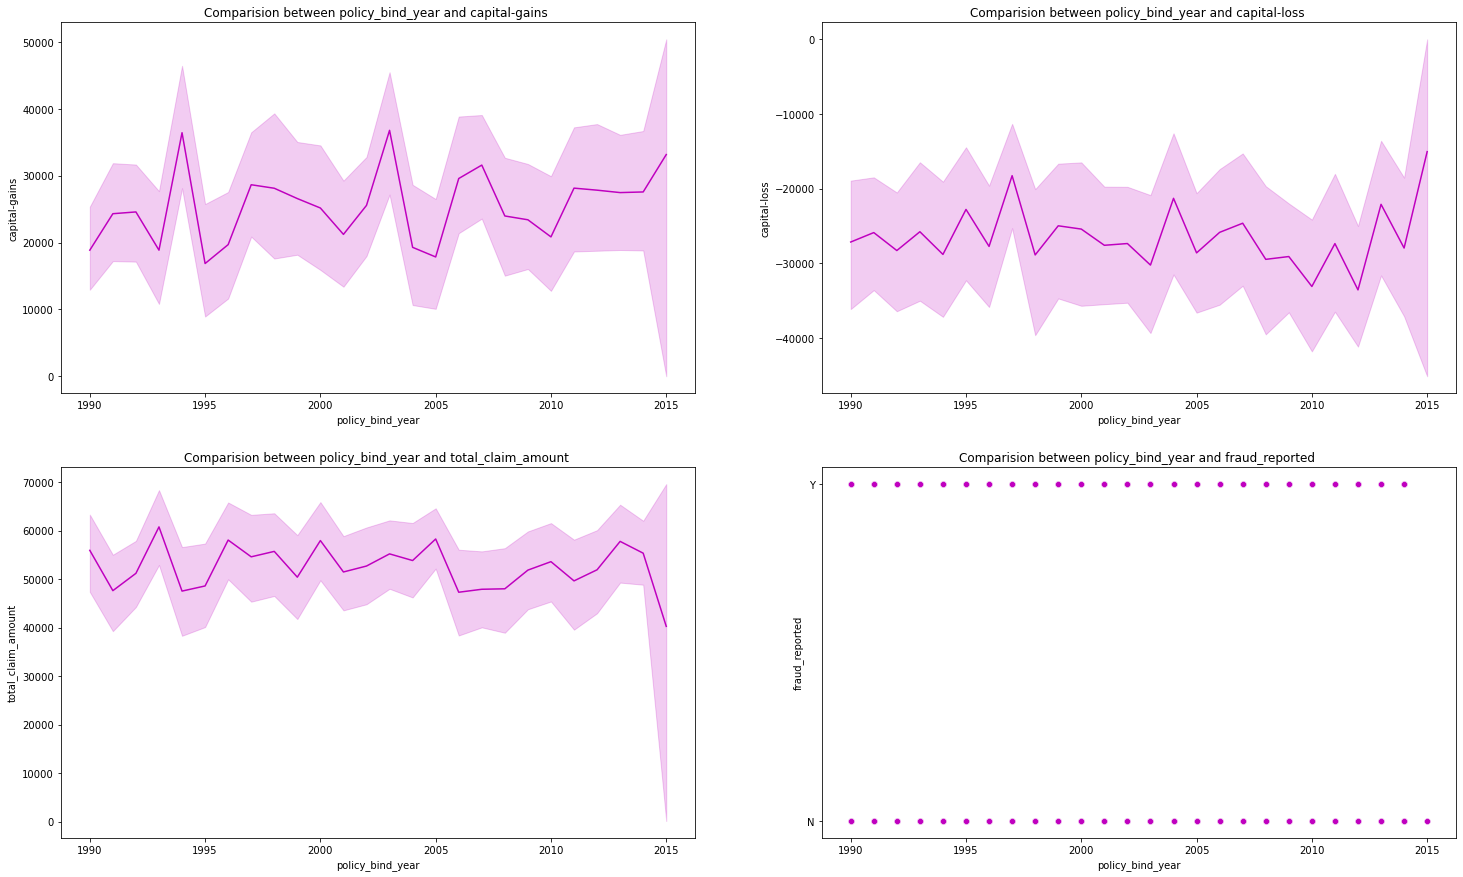

In [62]:
#Comparision between 'policy_bind_year and other attributes'
plt.figure(figsize=[25,15])

plt.subplot(2,2,1)
plt.title('Comparision between policy_bind_year and capital-gains ')
sns.lineplot(df_insurance['policy_bind_year'],df_insurance['capital-gains'],color='m');

plt.subplot(2,2,2)
plt.title('Comparision between policy_bind_year and capital-loss ')
sns.lineplot(df_insurance['policy_bind_year'],df_insurance['capital-loss'],color='m');

plt.subplot(2,2,3)
plt.title('Comparision between policy_bind_year and total_claim_amount ')
sns.lineplot(df_insurance['policy_bind_year'],df_insurance['total_claim_amount'],color='m');

plt.subplot(2,2,4)
plt.title('Comparision between policy_bind_year and fraud_reported ')
sns.scatterplot(df_insurance['policy_bind_year'],df_insurance['fraud_reported'],color='m');



Obs-
* We can see the 'Capital-gains' start from 20000 and the customers with policy-bind year 1994 and 2004 have gained the most gain.
* The losses suffered by is least for customers whose ploicy-bind year is 2015(nearly 18000), and more than 30000 for year 2012
* The claim- amount is more for older customers with more bind-years.
* Policy-bind year has no role in fraud-detected

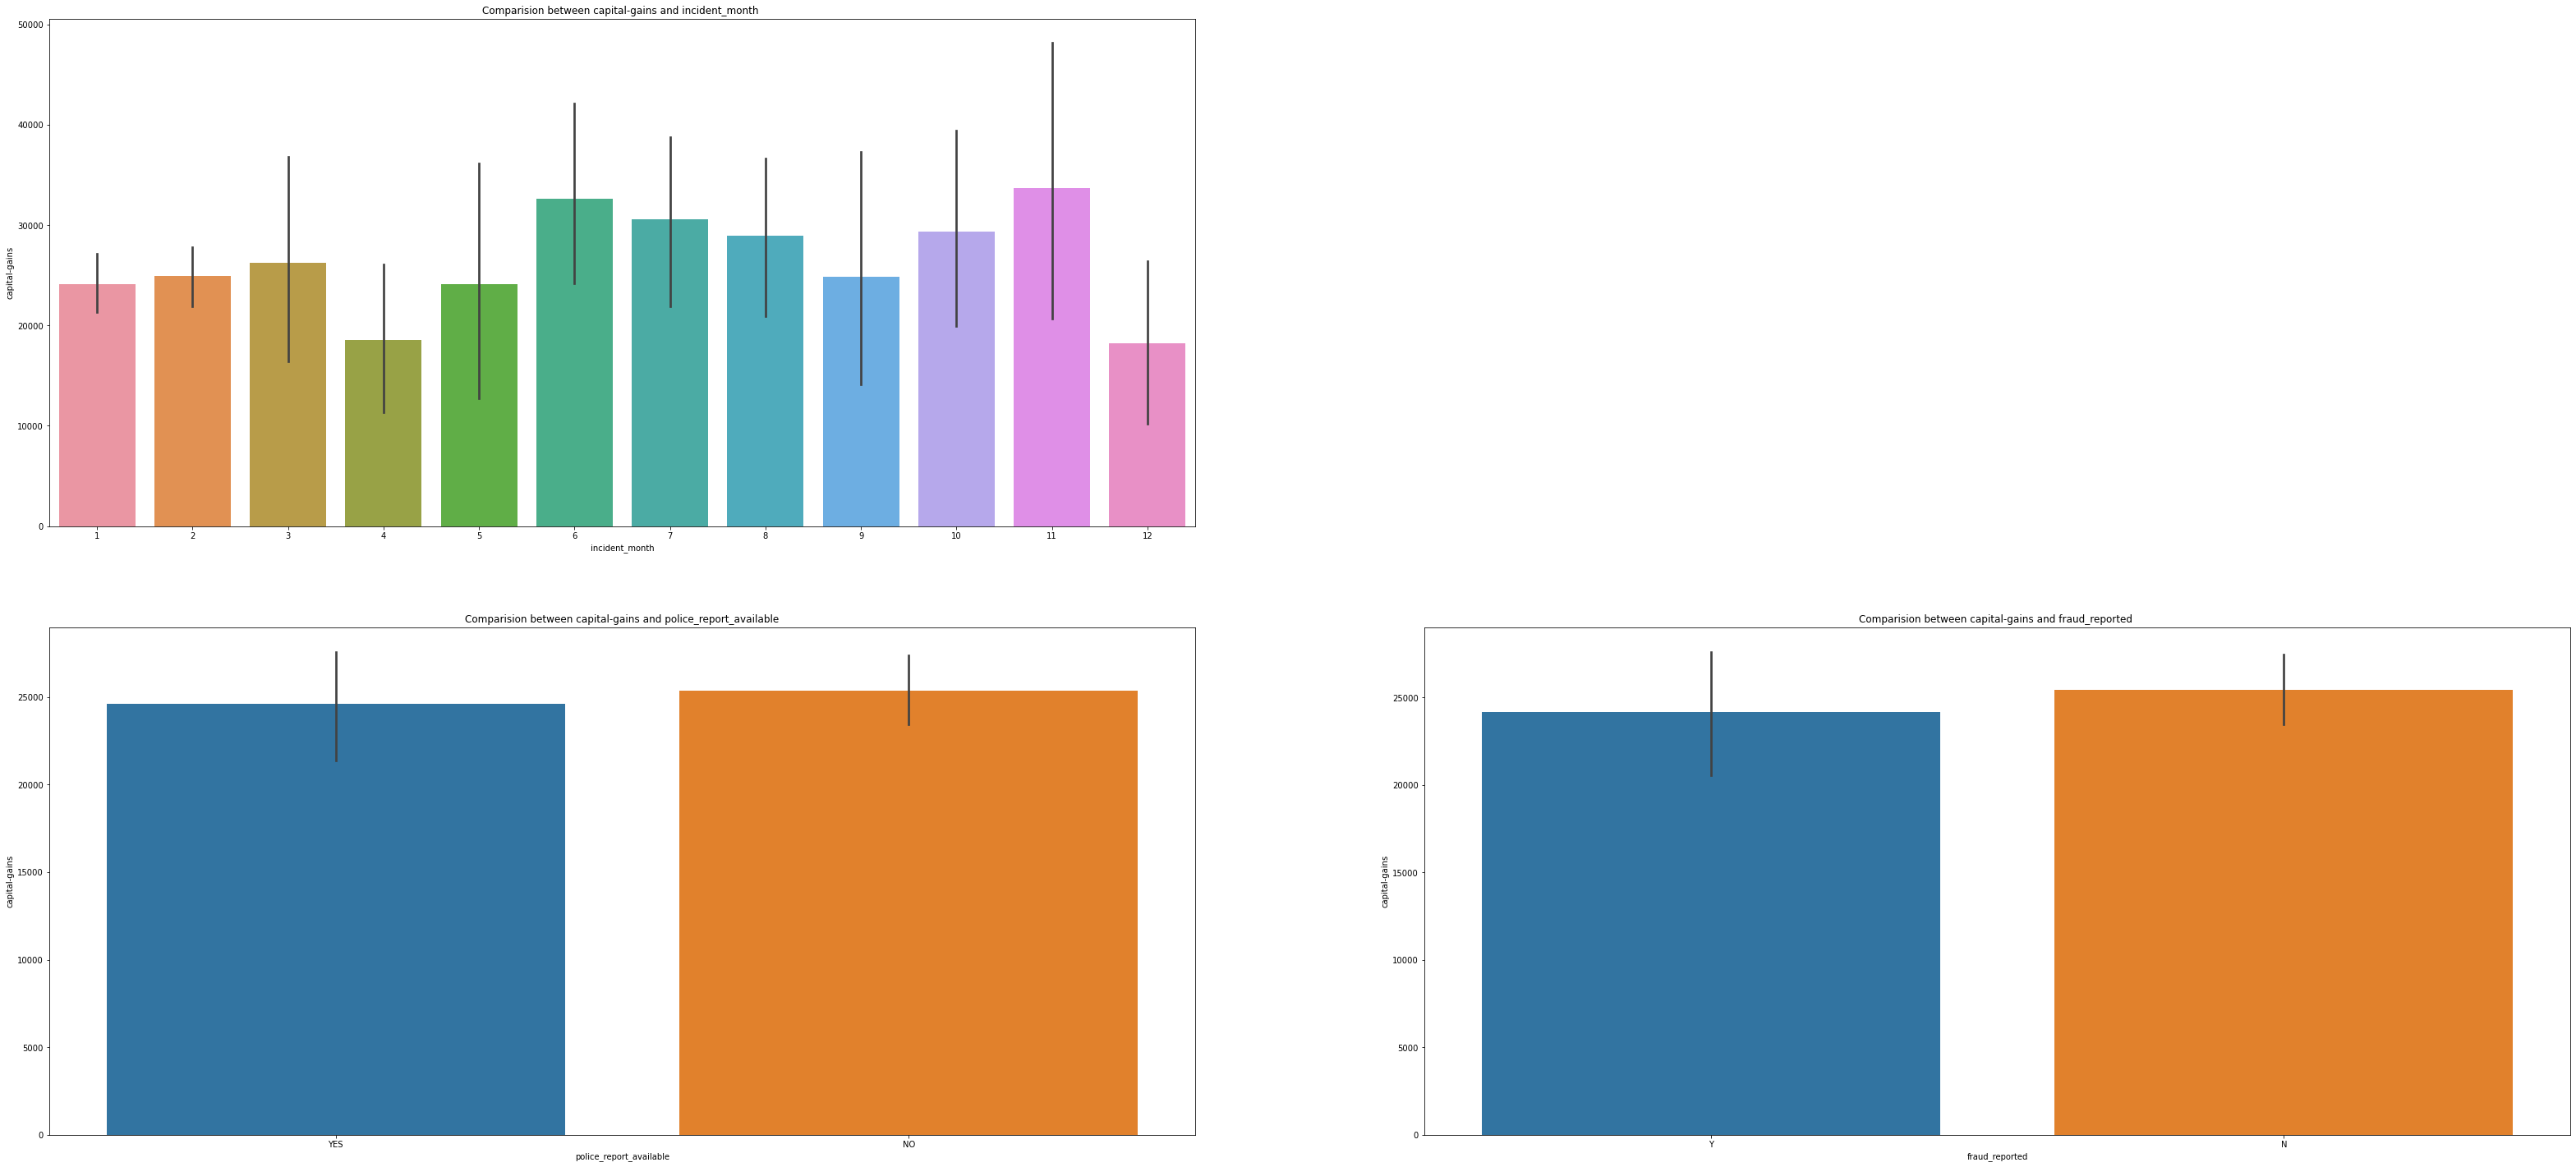

In [63]:
#Comparision between 'capital-gains and other attributes'
plt.figure(figsize=[55,25])

plt.subplot(2,2,1)
plt.title('Comparision between capital-gains and incident_month ')
sns.barplot(df_insurance['incident_month'],df_insurance['capital-gains']);

plt.subplot(2,2,3)
plt.title('Comparision between capital-gains and police_report_available')
sns.barplot(df_insurance['police_report_available'],df_insurance['capital-gains']);

plt.subplot(2,2,4)
plt.title('Comparision between capital-gains and fraud_reported ')
sns.barplot(df_insurance['fraud_reported'],df_insurance['capital-gains']);

Obs- 
* We can see the Capital-gains are highest when the incident month is 11(November), Followed by 6(June),7(July) and least for 4(April)
* The capital_gains are slightly more with customers who don't have police report available(however, this is also because such customers are more)
* The capital_gains are more for the customers who are reported fraud( because without loss eventually they are claiming the insurance)

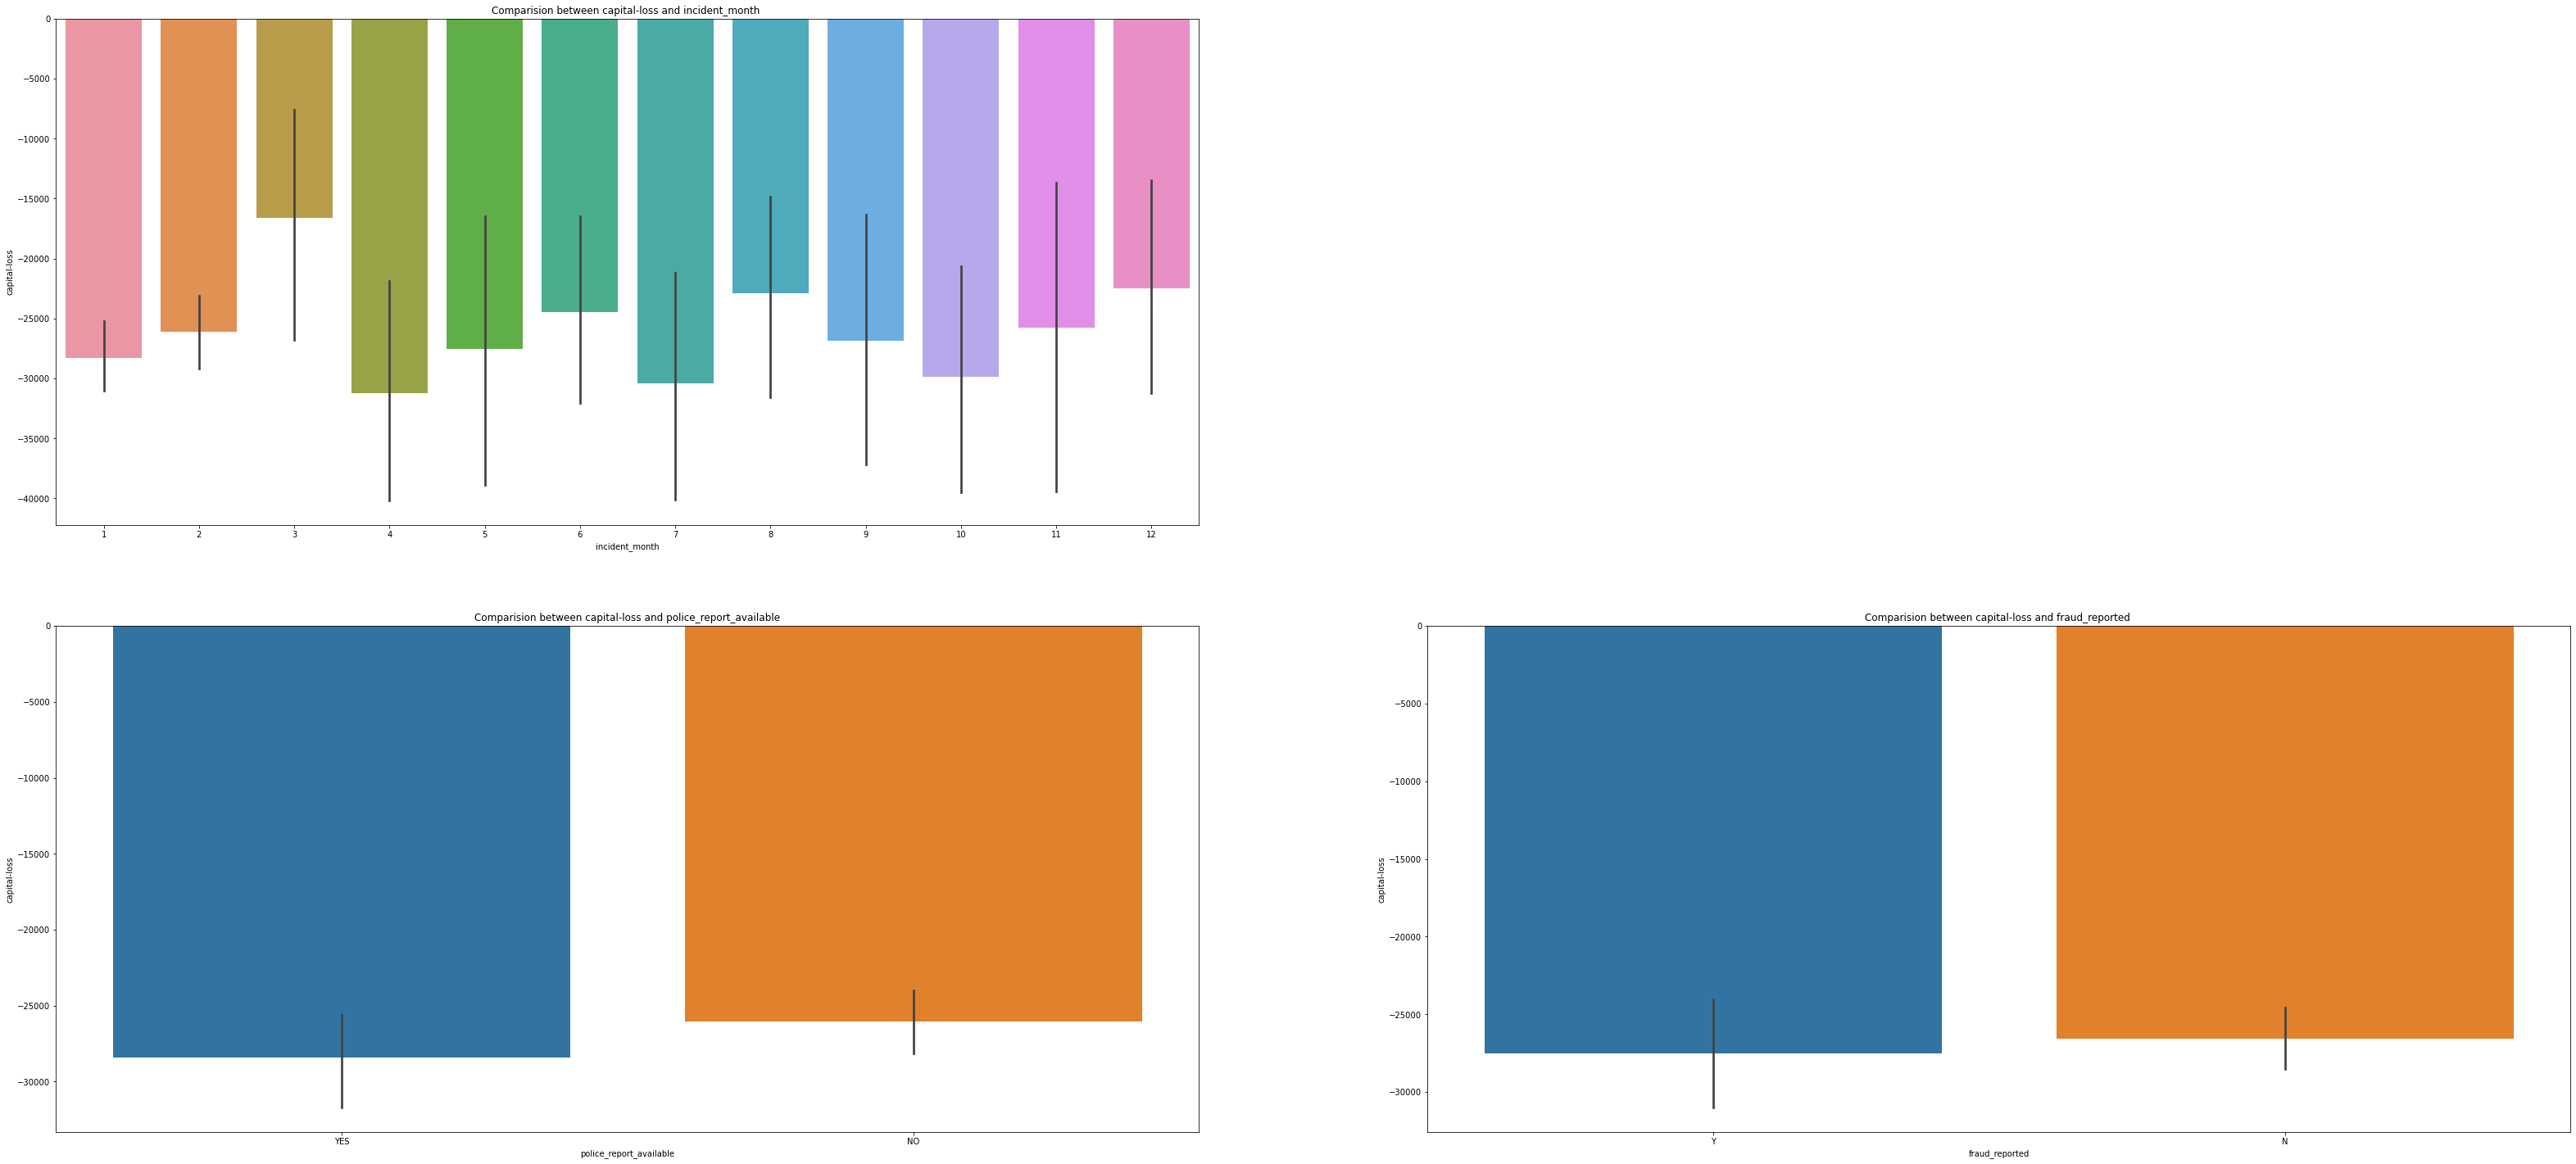

In [64]:
#Comparision between 'capital-loss and other attributes'
plt.figure(figsize=[55,25])

plt.subplot(2,2,1)
plt.title('Comparision between capital-loss and incident_month ')
sns.barplot(df_insurance['incident_month'],df_insurance['capital-loss']);

plt.subplot(2,2,3)
plt.title('Comparision between capital-loss and police_report_available')
sns.barplot(df_insurance['police_report_available'],df_insurance['capital-loss']);

plt.subplot(2,2,4)
plt.title('Comparision between capital-loss and fraud_reported ')
sns.barplot(df_insurance['fraud_reported'],df_insurance['capital-loss']);

Obs- 
* The maximu-loss can be observed in the month of 4(April) and 7(July) and the least loss is for the month of 3(March)
* The capital_loss is more for customers who have police-report available(as no fake proofs can be presented in that case and thus profit hcnaces are low)
* The capital_loss of customers who are reported as fraud is more as compared to who are not reported fraud

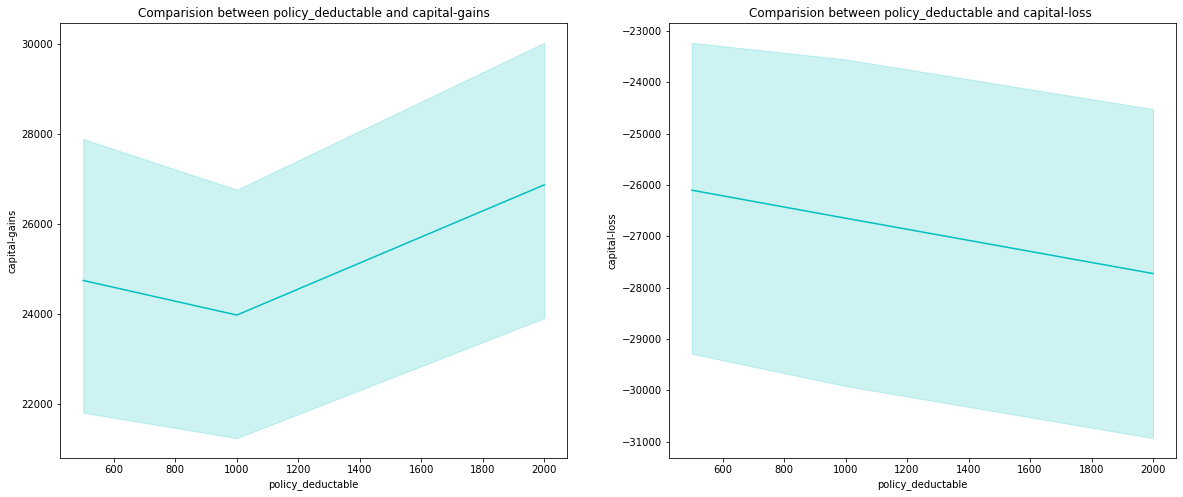

In [65]:
#Comparision between 'policy_deductable  and other attributes'
plt.figure(figsize=[20,8])

plt.subplot(1,2,1)
plt.title('Comparision between policy_deductable and capital-gains')
sns.lineplot(df_insurance['policy_deductable'],df_insurance['capital-gains'],color='c');

plt.subplot(1,2,2)
plt.title('Comparision between policy_deductable and capital-loss ')
sns.lineplot(df_insurance['policy_deductable'],df_insurance['capital-loss'],color='c');


Obs- 
* We can see the more is the number of policy-decuctable-amount, the more is capital-gain
* However there are also cases where capital-loss is more for more number of policy-deductable amount 

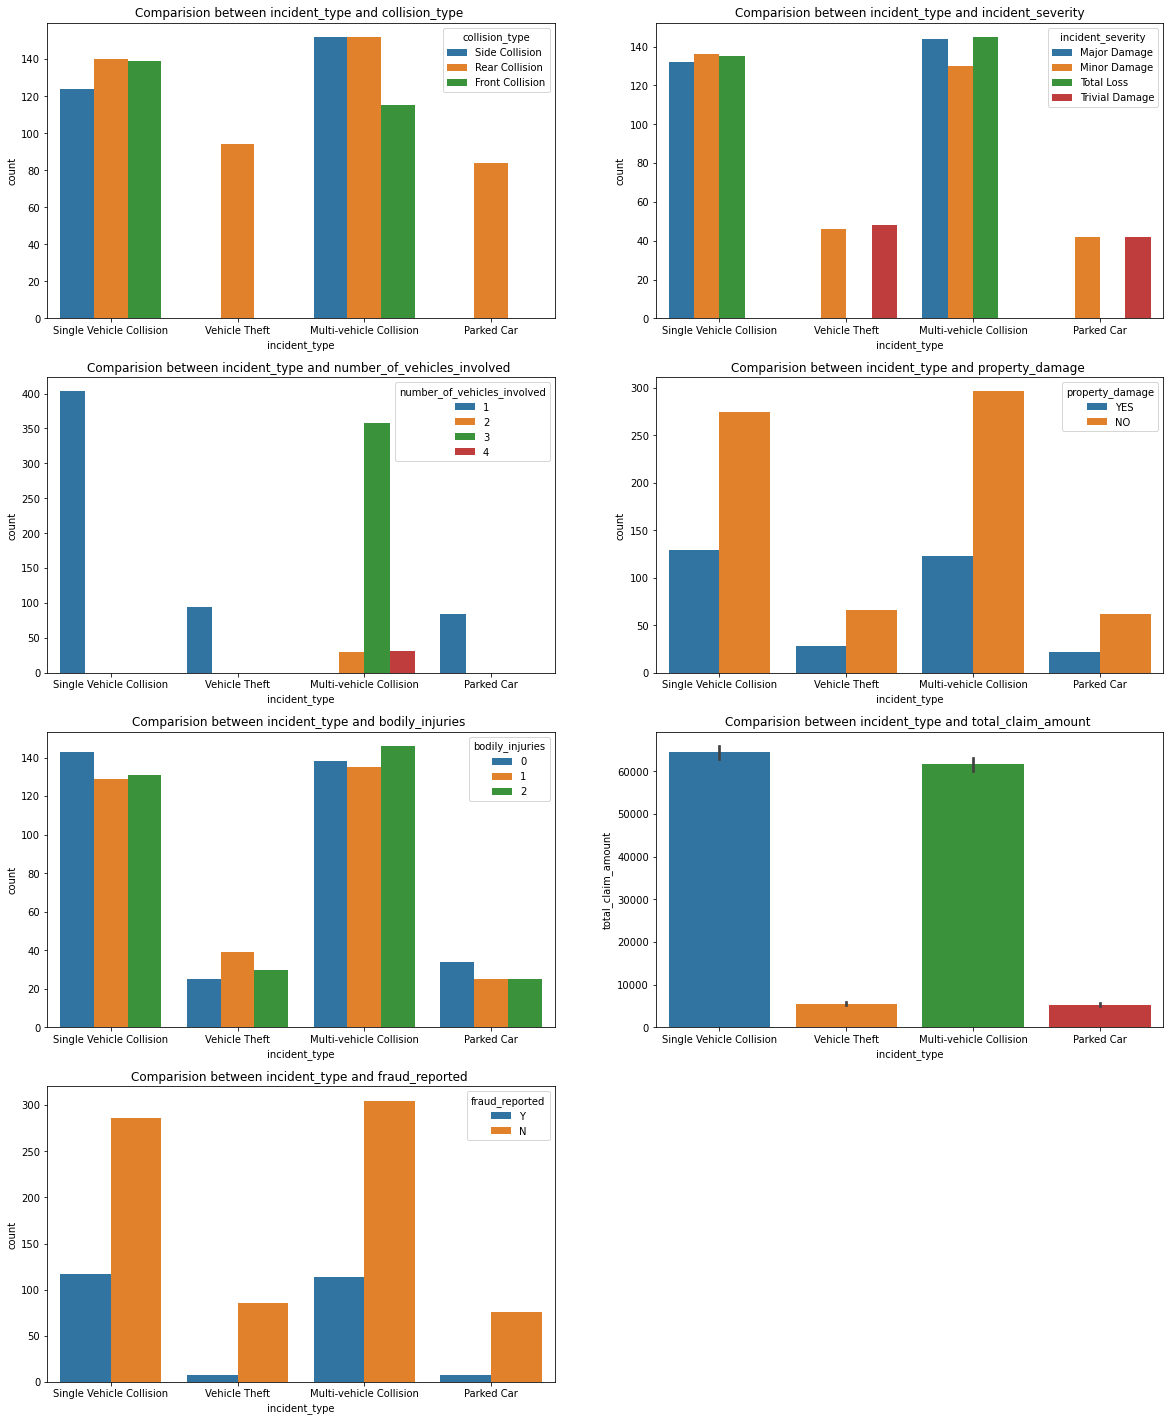

In [66]:
#Comparision between 'incident_type and other attributes'
plt.figure(figsize=[20,25])

plt.subplot(4,2,1)
plt.title('Comparision between incident_type and collision_type ')
sns.countplot(df_insurance['incident_type'],hue=df_insurance['collision_type']);

plt.subplot(4,2,2)
plt.title('Comparision between incident_type and incident_severity')
sns.countplot(df_insurance['incident_type'],hue=df_insurance['incident_severity']);

plt.subplot(4,2,3)
plt.title('Comparision between incident_type and number_of_vehicles_involved ')
sns.countplot(df_insurance['incident_type'],hue=df_insurance['number_of_vehicles_involved']);

plt.subplot(4,2,4)
plt.title('Comparision between incident_type and property_damage ')
sns.countplot(df_insurance['incident_type'],hue=df_insurance['property_damage']);

plt.subplot(4,2,5)
plt.title('Comparision between incident_type and bodily_injuries ')
sns.countplot(df_insurance['incident_type'],hue=df_insurance['bodily_injuries']);

plt.subplot(4,2,6)
plt.title('Comparision between incident_type and total_claim_amount ')
sns.barplot(df_insurance['incident_type'],y=df_insurance['total_claim_amount']);

plt.subplot(4,2,7)
plt.title('Comparision between incident_type and fraud_reported ')
sns.countplot(df_insurance['incident_type'],hue=df_insurance['fraud_reported']);



Obs-
* The collision type for incident of type 'Vehicle Theft' or 'ParkedCar' is rear only, while for Single Vehicle Collision/Multi-Vehicle Collision it has all the three types of collision
* The damage during 'Single Vehicle collision/Multi-vehicle Collision' ranges from 'MajorDamage-TotalLoss-MinorDamage', but for 'VehicleTheft or ParkedCar' it is either 'MinorDamage or TrivislDamage'
* For 'Single Vehicle Collision/Vehicle Theft/Parked Car', only 1 vehicle is involved, for Multi-Vehicle Collisiom 2-4 vehicles can be involved
* The percentage of Property-damage for all the incident-type is almost same. And the property-damage cases are 50% of no-property damage
* The body injuries for any incident-type can be either 0 or 1 or 2.
* The claim-amount for 'Single Vehicle Collision/Multiple Vehicle Collision' is way higher than 'Vehicle Theft/Parked Car'
* The fraud reported are more for 'Single Vehicle Collision/Multiple Vehicle Collision', a very few frauds are however also reported about 'Vehicle Theft/Parked Car' 

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

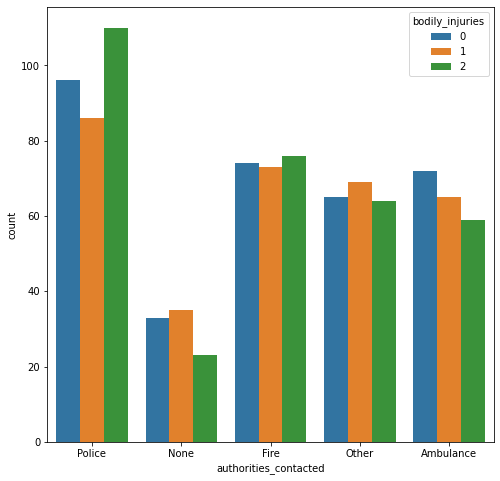

In [67]:
# Count plot on which authorities are contacted for different bodily-injuries
plt.figure(figsize=(8,8))
sns.countplot(x='authorities_contacted',hue='bodily_injuries', data=df_insurance)

Obs- For bodily injuries during the incident, the major authorities contacted are 'Police','Fire','Ambulance', or some 'others'(friends/family), in very less cases the bodily injuries are ignored and no one is contacted'

<AxesSubplot:xlabel='property_damage', ylabel='count'>

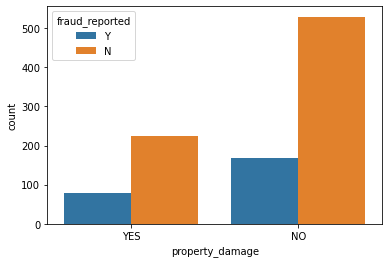

In [68]:
# Count plot on property_damage as per fraud_reported'
sns.countplot(x='property_damage',hue='fraud_reported', data=df_insurance)

Obs- We can see more number of fraud-cases reported when there is no property damage

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

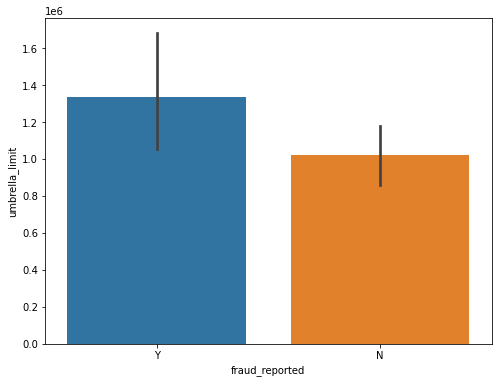

In [69]:
# Bar plot on 'total_claim_amount' and 'umbrella-limit'
plt.figure(figsize=(8,6))
sns.barplot(y='umbrella_limit',x='fraud_reported', data=df_insurance)

Obs- As umbrella-limit is the extra amount other than claims, we can see more no. of fraud cases are reported to avail the extra benefits

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

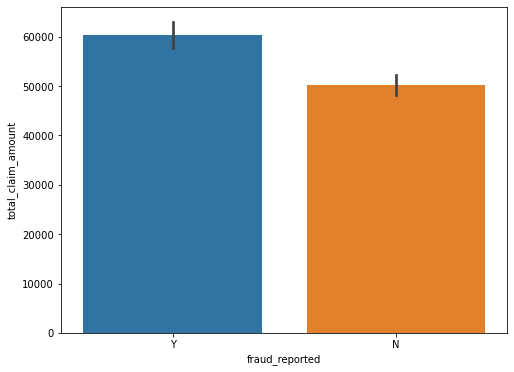

In [70]:
# Bar plot on 'total_claim_amount' and 'fraud_reported'
plt.figure(figsize=(8,6))
sns.barplot(y='total_claim_amount',x='fraud_reported', data=df_insurance)

Obs- The proportion of farud-reported are more for higher claim_amount

## Label Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
for col in df_insurance[cat_cols]:  
    le = LabelEncoder()
    df_insurance[col] = le.fit_transform(df_insurance[col])

In [73]:
df_insurance.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available  

Obs- We can see all the columns have been encoded with corresponding numerical values

## Checking Correlation

In [74]:
df_insurance.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day,incident_month,incident_day
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.072787,-0.059581,0.010021,0.005369,-0.000130,0.070639,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544,-0.048276,0.005750,0.051728,0.024659,-0.011092
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.075642,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143,-0.037444,0.015501,0.053869,0.023404,-0.006131
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.052438,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,-0.008465,0.013384,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432,-0.007276,0.071450,0.002277,0.023643,0.014745
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,0.011997,0.020641,0.022530,0.056182,0.032814,0.009333,-0.001869,-0.019403,-0.027634,-0.000595,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,-0.016466,-0.045345,0.018973,-0.011794,-0.004156
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,-0.053912,-0.015711,-0.000760,0.006517,-0.045117,0.060935,0.051214,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817,-0.049598,-0.050416,0.009164,-0.006418,-0.018160
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.036556,-0.011155,-0.055191,0.046434,0.048724,-0.001578,-0.045991,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480,0.001249,-0.035355,-0.025183,0.021559,0.014835
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,0.015966,0.010041,0.009466,0.029044,-0.077492,0.013094,-0.023257,-0.021270,-0.076358,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622,0.048008,0.009961,-0.045207,0.042409,-0.021716
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.020494,-0.021705,0.009952,-0.014293,-0.028168,0.017914,-0.022379,0.014470,0.019290,0.018793,0.026969,-0.020297,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873,-0.032891,-0.004033,0.040713,0.024227,-0.007280
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.009002,1.000000,-0.020298,0.021807,-0.023488,0.039912,0.041193,0.013704,-0.019230,-0.006420,-0.010838,-0.005903,-0.018636,-0.057061,-0.003768,-0.048909,-0.012072,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.05520

<AxesSubplot:>

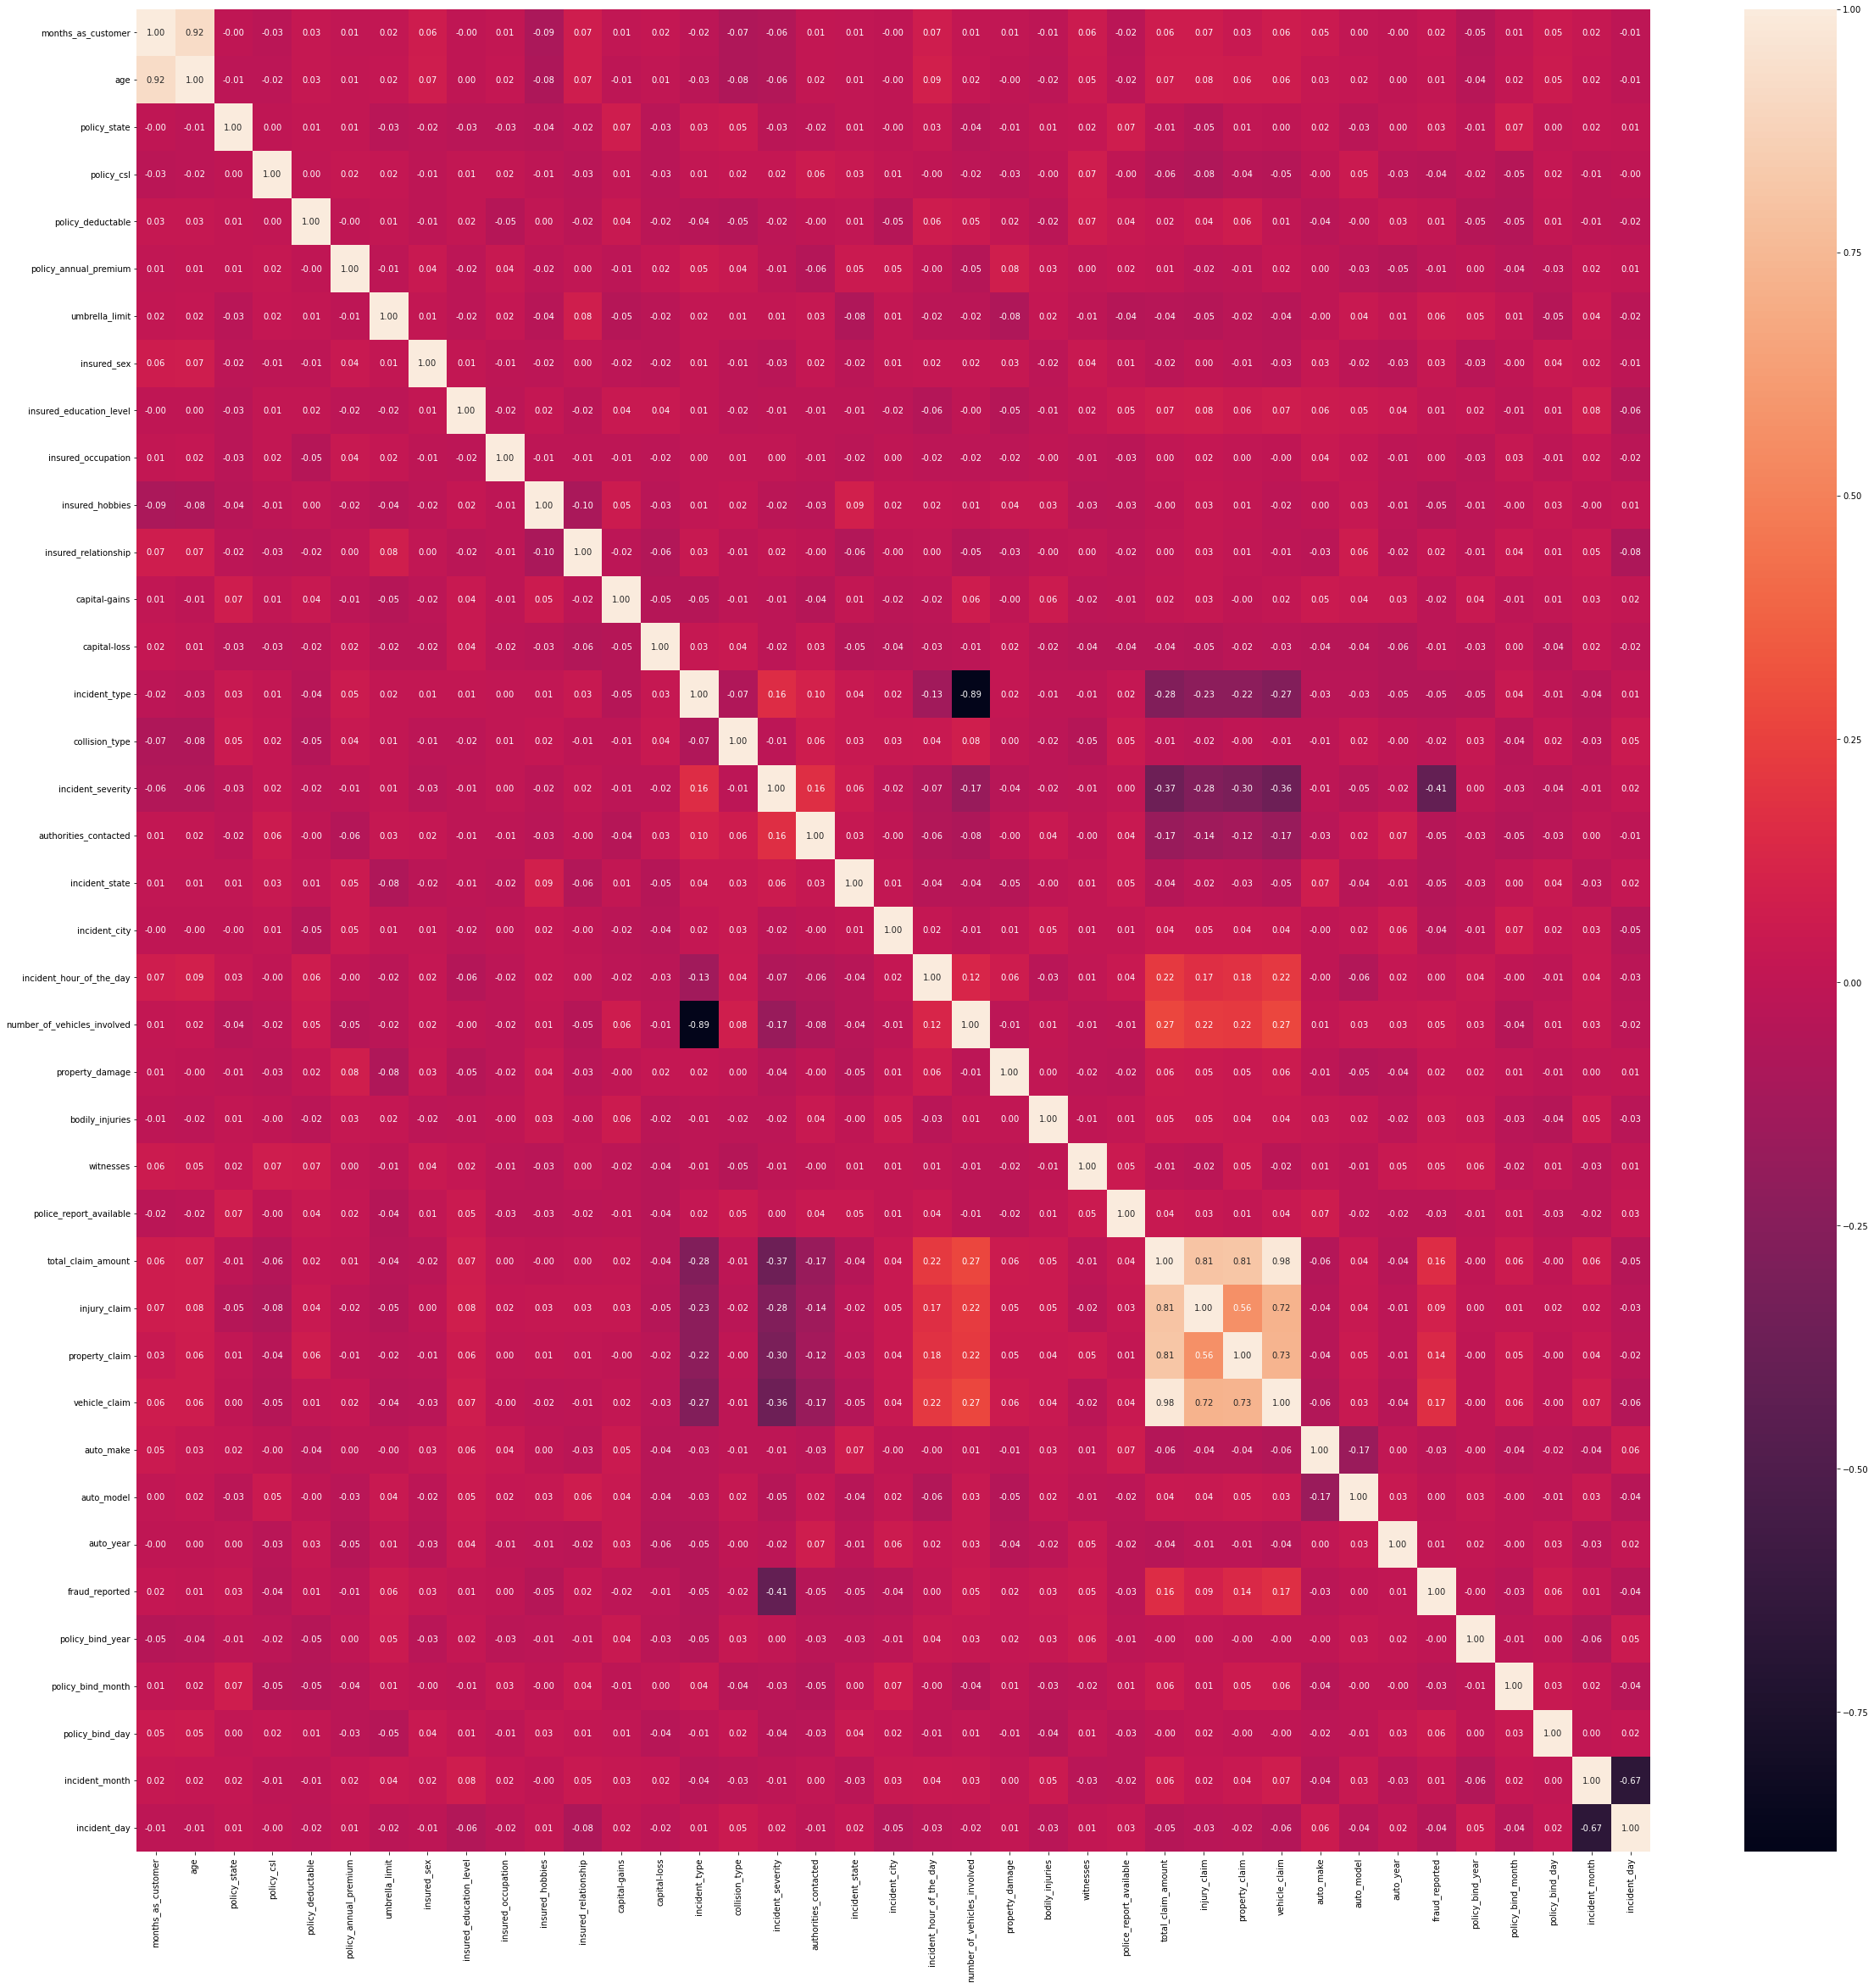

In [75]:
# Correlation using heatmap
plt.figure(figsize=(40,40))
sns.heatmap(df_insurance.corr(),annot=True,fmt='0.2f')

Obs-We can see,

* highly positive correlated columns(>=0.7):('months_as_customer and age '),('total_claim_amount and injury_claim/property_claim/vehicle_claim') , ('injury_claim and vehicle_claim'),('property_claim and vehicle_claim')
* positive correlated columns(>=0.4):None
* highly negative correlated columns(>=-0.6):('number_of_vehicles_involved and incident_type'),('incident_month and incident_day')
* negative correlated columns(>=0.4):('incident_severity and fraud_reported')

#### * We can also predict that multi-collinearity is present, thus would be checking it through VIF and removing it later.

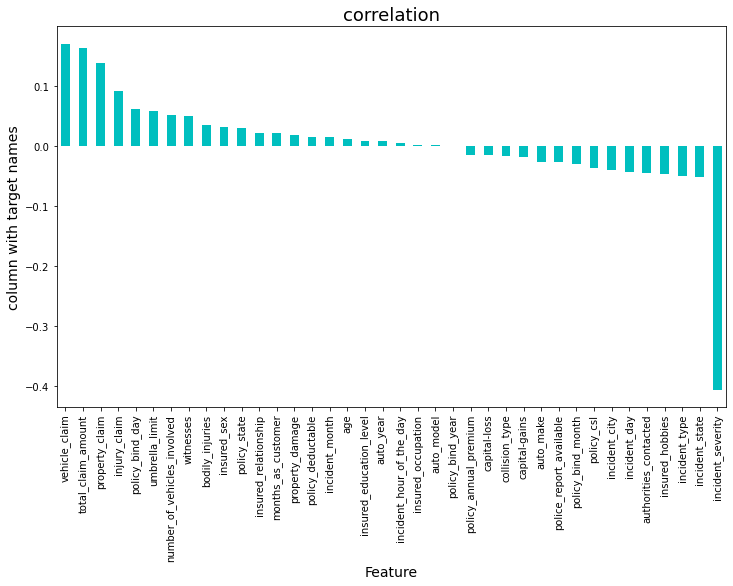

In [76]:
# Correlation of features with Target Column 
plt.figure(figsize=(12,7))
df_insurance.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Obs- Except for incident_severity which is highest negatively-correlated with the target, none other columns have good correlation with the target

## Detecting Outliers and Treating them

In [77]:
# Using Z-Score method
from scipy.stats import zscore
z=np.abs(zscore(df_insurance[num_cols])) # detecting only numerical cols
threshold=3

In [78]:
df_insurance_out=df_insurance[num_cols][(z<3).all(axis=1)]

In [79]:
print("df_insurance_out.shape:",df_insurance_out.shape)

df_insurance_out.shape: (980, 21)


In [80]:
dropindx = df_insurance.index.difference(df_insurance_out.index)

In [81]:
dropindx

Int64Index([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
            657, 700, 763, 807, 875, 922, 975],
           dtype='int64')

In [82]:
df_insurance.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [83]:
df_insurance.reset_index(drop=True,inplace = True)

In [84]:
df_insurance.shape

(980, 39)

## Data Transformation to treat Skewness

### Checking Skewness

In [85]:
df_insurance[num_cols].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
auto_year                     -0.054522
policy_bind_year               0.065022
policy_bind_month             -0.024643
policy_bind_day                0.028152
incident_month                 1.388336
incident_day                   0.055443
dtype: float64

Obs- Keeping the acceptable range +/- 0.5, we can see skewness is present in columns: 'umbrella_limit','number_of_vehicles_involved','total_claim_amount','vehicle_claim' and 'incident_month'

* We have seen earlier that Umbrella-limit have almost 95% of the values as 0, and therefore we will not treat the skewness of this column 

### Applying Transformation Method

In [86]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() 
skew_col = ['number_of_vehicles_involved','total_claim_amount','vehicle_claim','incident_month']
df_insurance[skew_col]= pt.fit_transform(df_insurance[skew_col].values)

In [87]:
# Rechecking the skewness
df_insurance[num_cols].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.372833
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.508540
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.521805
auto_year                     -0.054522
policy_bind_year               0.065022
policy_bind_month             -0.024643
policy_bind_day                0.028152
incident_month                 0.306287
incident_day                   0.055443
dtype: float64

Obs- The skewness have come under acceptable range now

## Model Building

### Seperating Input and Target variables

In [88]:
x=df_insurance.drop(columns='fraud_reported')
y=df_insurance['fraud_reported']

In [89]:
x.shape

(980, 38)

In [90]:
y.shape

(980,)

### Data Scaling

In [91]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x_scale=pd.DataFrame(x_scale,columns=x.columns)

In [92]:
x=pd.DataFrame(data=x_scale)

### Checking Multi-Collinearity

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_cal():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

vif_cal()

      VIF Factor                     Features
0       6.914144           months_as_customer
1       6.924486                          age
2       1.036885                 policy_state
3       1.036339                   policy_csl
4       1.050281            policy_deductable
5       1.037045        policy_annual_premium
6       1.044073               umbrella_limit
7       1.031038                  insured_sex
8       1.049291      insured_education_level
9       1.017468           insured_occupation
10      1.051818              insured_hobbies
11      1.055893         insured_relationship
12      1.040801                capital-gains
13      1.043169                 capital-loss
14      6.354662                incident_type
15      1.047935               collision_type
16      1.239043            incident_severity
17      1.105855        authorities_contacted
18      1.053585               incident_state
19      1.033443                incident_city
20      1.101367     incident_hour

* Keeping the acceptable range as below or equal 10, we observe the VIF of 'total_claim_amount','injury_claim','property_claim','vehicle_claim' is very high, we have also observed that all these columsn are highly correlated to each other.


* Deleting the columns 'total_claim_amount' as it has highest VIF and also it is formed by addition of injury_claim','property_claim' and 'vehicle_claim

In [95]:
x.drop('total_claim_amount', axis =1, inplace=True) # Dropping ''total_claim_amount' column

In [96]:
# Rechecking the VIF
vif_cal()

    VIF Factor                     Features
0     6.911306           months_as_customer
1     6.924477                          age
2     1.036860                 policy_state
3     1.035629                   policy_csl
4     1.048764            policy_deductable
5     1.036231        policy_annual_premium
6     1.044011               umbrella_limit
7     1.028382                  insured_sex
8     1.049230      insured_education_level
9     1.016593           insured_occupation
10    1.049774              insured_hobbies
11    1.055892         insured_relationship
12    1.040786                capital-gains
13    1.042867                 capital-loss
14    6.352642                incident_type
15    1.047698               collision_type
16    1.194271            incident_severity
17    1.083841        authorities_contacted
18    1.049409               incident_state
19    1.031728                incident_city
20    1.095778     incident_hour_of_the_day
21    6.358924  number_of_vehicl

Obs- We can see no multicollinearity in the data now

### Checking for Imbalance

In [97]:
print(y.value_counts())

0    740
1    240
Name: fraud_reported, dtype: int64


Obs- We can see the data is imbalanced, balancing it using Oversampling below

### Oversampling using SMOTE

In [99]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y= SM.fit_resample(x,y)

In [100]:
print(y.value_counts())

1    740
0    740
Name: fraud_reported, dtype: int64


### Data Modelling(Classification Model)

In [102]:
# Finding best Random State

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    predlg = lg.predict(x_test)
    acc=accuracy_score(y_test, predlg)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7918918918918919  on Random_state  49


### Splitting data into Train-Test

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=49)

In [104]:
x_train.shape

(1110, 37)

In [105]:
y_train.shape

(1110,)

In [106]:
x_test.shape

(370, 37)

In [107]:
y_test.shape

(370,)

### Using various Machine Learning Algorithms

In [108]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### 1. Logistic Regression

In [109]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predlg))
print("Confusion Matrix:\n",confusion_matrix(y_test,predlg))
print("Classification Report:\n",classification_report(y_test,predlg))

Accuracy: 0.7918918918918919
Confusion Matrix:
 [[151  48]
 [ 29 142]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80       199
           1       0.75      0.83      0.79       171

    accuracy                           0.79       370
   macro avg       0.79      0.79      0.79       370
weighted avg       0.80      0.79      0.79       370



Obs- The Logistic Regression has provided the accuracy_score:0.7918918918918919 and f1-score:0.80

#### 2. GaussianNB

In [110]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgnb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgnb))
print("Classification Report:\n",classification_report(y_test,predgnb))

Accuracy: 0.7513513513513513
Confusion Matrix:
 [[139  60]
 [ 32 139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75       199
           1       0.70      0.81      0.75       171

    accuracy                           0.75       370
   macro avg       0.76      0.76      0.75       370
weighted avg       0.76      0.75      0.75       370



Obs- The GaussianNB has provided the accuracy_score: 0.7513513513513513 and f1-score:0.75

#### 3.Decision Tree Classifier

In [111]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,preddtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,preddtc))
print("Classification Report:\n",classification_report(y_test,preddtc))

Accuracy: 0.8621621621621621
Confusion Matrix:
 [[172  27]
 [ 24 147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       199
           1       0.84      0.86      0.85       171

    accuracy                           0.86       370
   macro avg       0.86      0.86      0.86       370
weighted avg       0.86      0.86      0.86       370



Obs- The Decision Tree Classifier has provided the accuracy-score:0.8621621621621621 and f1-score:0.87

#### 4.K Nearest Neighbor Classifier

In [112]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predknn))
print("Confusion Matrix:\n",confusion_matrix(y_test,predknn))
print("Classification Report:\n",classification_report(y_test,predknn))

Accuracy: 0.6567567567567567
Confusion Matrix:
 [[ 79 120]
 [  7 164]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.40      0.55       199
           1       0.58      0.96      0.72       171

    accuracy                           0.66       370
   macro avg       0.75      0.68      0.64       370
weighted avg       0.76      0.66      0.63       370



Obs- The K Nearest Neighbor Classifier has provided the accuracy-score:0.6567567567567567 and f1-score:0.55

#### 5.Support Vector Machine Classifier

In [113]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predsvc))
print("Confusion Matrix:\n",confusion_matrix(y_test,predsvc))
print("Classification Report:\n",classification_report(y_test,predsvc))

Accuracy: 0.8810810810810811
Confusion Matrix:
 [[173  26]
 [ 18 153]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       199
           1       0.85      0.89      0.87       171

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370



Obs- The Support Vector Machine Classifier has provided the accuracy-score:0.8810810810810811 and f1-score:0.89

#### 6. Ensemble Methods
##### 6.1 Random Forest Classifier

In [114]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf))
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf))
print("Classification Report:\n",classification_report(y_test,predrf))

Accuracy: 0.9054054054054054
Confusion Matrix:
 [[181  18]
 [ 17 154]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       199
           1       0.90      0.90      0.90       171

    accuracy                           0.91       370
   macro avg       0.90      0.91      0.90       370
weighted avg       0.91      0.91      0.91       370



Obs- The Random Forest Classifier has provided the accuracy-score:0.9054054054054054 and f1-score:0.91

##### 6.2 Ada Boost Classifier

In [115]:
ad=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predad))
print("Confusion Matrix:\n",confusion_matrix(y_test,predad))
print("Classification Report:\n",classification_report(y_test,predad))

Accuracy: 0.8783783783783784
Confusion Matrix:
 [[179  20]
 [ 25 146]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       199
           1       0.88      0.85      0.87       171

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370



Obs- The Ada Boost Classifier has provided the accuracy-score:0.8783783783783784 and f1-score:0.89

##### 6.3 Gradient Boosting Classifier

In [116]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgb))
print("Classification Report:\n",classification_report(y_test,predgb))

Accuracy: 0.9108108108108108
Confusion Matrix:
 [[180  19]
 [ 14 157]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       199
           1       0.89      0.92      0.90       171

    accuracy                           0.91       370
   macro avg       0.91      0.91      0.91       370
weighted avg       0.91      0.91      0.91       370



Obs- The Gradient Boosting Classifier has provided the accuracy-score:0.9108108108108108 and f1-score:0.92

### Cross Validation

In [117]:
from sklearn.model_selection import cross_val_score

In [118]:
# Using of K-Fold cross-validation technique

predlg= lg.predict(x_test)

from sklearn.model_selection import cross_val_score

test_accuracy= accuracy_score(y_test,predlg)

for j in range(5,11):
    cv_score=cross_val_score(lg,x,y,cv=j)
    cv_mean= cv_score.mean()
    print('At cv:',j)
    print('Cross_Validation_score is:',cv_mean*100)
    print('Accuracy is :',test_accuracy*100)
    print("\n")

At cv: 5
Cross_Validation_score is: 74.05405405405406
Accuracy is : 79.1891891891892


At cv: 6
Cross_Validation_score is: 73.38193827282402
Accuracy is : 79.1891891891892


At cv: 7
Cross_Validation_score is: 73.24318800219721
Accuracy is : 79.1891891891892


At cv: 8
Cross_Validation_score is: 73.58108108108108
Accuracy is : 79.1891891891892


At cv: 9
Cross_Validation_score is: 73.30910733349758
Accuracy is : 79.1891891891892


At cv: 10
Cross_Validation_score is: 73.78378378378379
Accuracy is : 79.1891891891892




Obs- Selecting the fold value as 5

In [119]:
# cv score for Logistic Regression 
cvlg=cross_val_score(lg,x,y,cv=7).mean()
print('CV score  for Logistic Regression:',cvlg)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predlg)-cvlg)

CV score  for Logistic Regression: 0.7324318800219721
And Difference between CV and accuracy_score= 0.05946001186991978


In [120]:
# cv score for GaussianNB 
cvgnb=cross_val_score(gnb,x,y,cv=7).mean()
print('CV score  for Gaussian NB:',cvgnb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgnb)-cvgnb)

CV score  for Gaussian NB: 0.72911051212938
And Difference between CV and accuracy_score= 0.022240839221971287


In [121]:
# cv score for Decision Tree Classifier 
cvdtc=cross_val_score(dtc,x,y,cv=7).mean()
print('CV score  for Decision Tree Classifier:',cvdtc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddtc)-cvdtc)

CV score  for Decision Tree Classifier: 0.8224377562882436
And Difference between CV and accuracy_score= 0.03972440587391857


In [122]:
# cv score for K Neighbors Classifier 
cvknn=cross_val_score(knn,x,y,cv=7).mean()
print('CV score  for K Neighbors Clssifier:',cvknn)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predknn)-cvknn)

CV score  for K Neighbors Clssifier: 0.6784436836524826
And Difference between CV and accuracy_score= -0.021686926895725933


In [123]:
# cv score for Support Vector Machine Classifier 
cvsvc=cross_val_score(svc,x,y,cv=7).mean()
print('CV score  for Support Vector Classifier:',cvsvc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predsvc)-cvsvc)

CV score  for Support Vector Classifier: 0.8764355335266539
And Difference between CV and accuracy_score= 0.004645547554427143


In [124]:
# cv score for Random Forest Classifier
cvrf=cross_val_score(rf,x,y,cv=7).mean()
print('CV score  for RandomForestClassifier:',cvrf)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrf)-cvrf)

CV score  for RandomForestClassifier: 0.8758191642927403
And Difference between CV and accuracy_score= 0.029586241112665057


In [125]:
# cv score for Ada Boost Classifier
cvad=cross_val_score(ad,x,y,cv=3).mean()
print('CV score  for Ada Boost Classifier:',cvad)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predad)-cvad)

CV score  for Ada Boost Classifier: 0.7805607793864439
And Difference between CV and accuracy_score= 0.09781759899193454


In [126]:
# cv score for GradientBoostingClassifier
cvgb=cross_val_score(gb,x,y,cv=3).mean()
print('CV score  for Gradienty Boosting Classifier:',cvgb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgb)-cvgb)

CV score  for Gradienty Boosting Classifier: 0.798114219860777
And Difference between CV and accuracy_score= 0.11269659095003381


Obs- 
* We can observe the difference between CV score and r2_score is least in the model Support Vector Machine Classifier

Finding best parmeters for Support Vector Machine Classifier using hyper tuning below

### Hyper Parameter Tuning

In [127]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [128]:
#Selecting few parameter list to pass in Support Vector Classifier
from sklearn.model_selection import GridSearchCV
# defining parameter range:

parameter = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma':['scale', 'auto', 'float'],
             'random_state':[14,35,42,57],
             'decision_function_shape':['ovo', 'ovr']}

In [129]:
# Passing this parameters to GridSearchCV
GCV = GridSearchCV(svc,parameter,cv=5,scoring='accuracy')

GCV.fit(x_train,y_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(x_test)    #predicting accuracy with obtained best parameter 
accuracy_score(y_test, GCV_pred)                  #Printing accuracy

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 14}


0.8810810810810811

In [132]:
#Applying best parameter values on Support Vector Classifier Algorithm 
insurance_best=SVC(decision_function_shape='ovo', gamma='scale', kernel= 'rbf', random_state=14)
insurance_best.fit(x_train,y_train)
predsvc1=insurance_best.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predsvc1))
print("Confusion Matrix:\n",confusion_matrix(y_test,predsvc1))
print("Classification Report:\n",classification_report(y_test,predsvc1))

Accuracy: 0.8810810810810811
Confusion Matrix:
 [[173  26]
 [ 18 153]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       199
           1       0.85      0.89      0.87       171

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.88      0.88      0.88       370



Our best model with best parameters has given a very good accuracy of  0.8810810810810811 and f1_score of 0.89

### Plotting ROC-AUC curve for best model

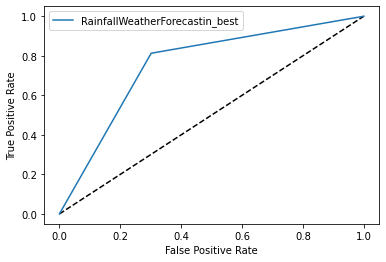

In [133]:
fpr,tpr,threshholds=roc_curve(y_test,predgnb)
auc = roc_auc_score(y_test,predgnb)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RainfallWeatherForecastin_best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Obs- The best model ie. Suppoert Vector Classifier has AUC(area under curve)=  88%

### Saving the best classification model

In [134]:
import joblib

joblib.dump(insurance_best,'Insurance.obj')

['Insurance.obj']

In [135]:
insurance_model=joblib.load('Insurance.obj')

In [136]:
insurance_model

SVC(decision_function_shape='ovo', random_state=14)

### Predicting the Output

In [137]:
ori = np.array(y_test)
predicted = np.array(insurance_model.predict(x_test))
df_new = pd.DataFrame({"Original":ori,"Predicted":predicted},index= range(len(ori)))
df_new.sample(10)

,Original,Predicted
171,0,0
305,1,1
173,0,0
7,1,1
4,0,0
21,0,0
292,1,1
285,1,1
166,0,0
307,1,0


Obs- We can see our best model has given majorly the same results as original

Text(0.5, 1.0, 'Original vs predicted  graph')

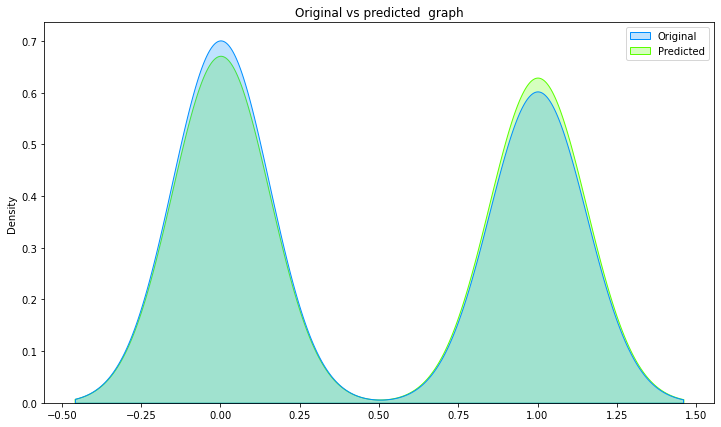

In [138]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

Obs- We can observe little difference in predicted and the original outputs graph

### Concluding Remarks for Classification Model

* We have predicted the outcome of if an insurance claim is fraudulent or not by collecting data of auto-insurance data of year 2015, having records of various customers with different age, policy-bind-date, different annual-premium, incident-types, incident-severity, total_claim etc


* We classified the output of "fraud_reported" using classification model. The prediction accuracies of these models were then checked.


* Also cross-validation was performed to avoid overfitting of models.


* The prediction results indicated that Support Vector Classifier model achieved higher prediction accuracy.